NAME: RUKAYAT ADEOSUN

TITLE: HEIRARCHICAL CLUSTERING

In [98]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
import numpy as np

In [2]:
# Data set
df = pd.read_csv('/Users/rukayatadeosun/Downloads/unNorm_CRT_data.csv')

In [3]:
new_label = [] 
for value in df["response"]: 
    if value <= 0: 
        new_label.append("__NORES")
    else: 
        new_label.append("__RES")
       
df["New_label"] = new_label   
pd.set_option('display.max_columns', 500,'display.max_rows', 500)

print(df) 

     ACEI_or_ARB   Age    CAD  Concordance   DM  ECG_pre_QRSd  Gender  HTN  \
0            1.0  59.0  False          0.0  0.0         220.0     0.0  0.0   
1            1.0  59.0   True          1.0  0.0         147.0     0.0  1.0   
2            1.0  77.0   True          0.0  1.0         160.0     0.0  1.0   
3            1.0  64.0   True          0.0  1.0         240.0     0.0  1.0   
4            0.0  67.0   True          0.0  1.0         190.0     1.0  1.0   
5            1.0  68.0  False          0.0  0.0         220.0     0.0  0.0   
6            1.0  76.0  False          0.0  1.0         200.0     0.0  1.0   
7            1.0  57.0  False          0.0  0.0         160.0     1.0  1.0   
8            1.0  67.0  False          1.0  1.0         160.0     1.0  1.0   
9            1.0  58.0   True          0.0  1.0         200.0     1.0  1.0   
10           1.0  50.0  False          0.0  0.0         150.0     0.0  1.0   
11           1.0  55.0   True          1.0  0.0         160.0   

In [4]:
df.columns

Index(['ACEI_or_ARB', 'Age', 'CAD', 'Concordance', 'DM', 'ECG_pre_QRSd',
       'Gender', 'HTN', 'ID', 'LBBB', 'MI', 'NYHA', 'Race', 'SPECT_pre_EDE',
       'SPECT_pre_EDSI', 'SPECT_pre_EDV', 'SPECT_pre_ESE', 'SPECT_pre_ESSI',
       'SPECT_pre_ESV', 'SPECT_pre_LVEF', 'SPECT_pre_PBW', 'SPECT_pre_PSD',
       'Smoking', 'SPECT_pre_50scar', 'response', 'New_label'],
      dtype='object')

In [5]:
# create a new column ID (New_ID) to label HC
df['New_ID'] = df[['ID', 'New_label']].apply(lambda x: ''.join(x), axis=1)
df

,ACEI_or_ARB,Age,CAD,Concordance,DM,ECG_pre_QRSd,Gender,HTN,ID,LBBB,MI,NYHA,Race,SPECT_pre_EDE,SPECT_pre_EDSI,SPECT_pre_EDV,SPECT_pre_ESE,SPECT_pre_ESSI,SPECT_pre_ESV,SPECT_pre_LVEF,SPECT_pre_PBW,SPECT_pre_PSD,Smoking,SPECT_pre_50scar,response,New_label,New_ID
0,1.0,59.0,False,0.0,0.0,220.0,0.0,0.0,BRA-002-LOMA,1.0,0.0,4.0,4,0.683490,0.729960,178.0,0.708673,0.705537,110.0,38.0,145.0,55.232853,0.0,17.0,1,__RES,BRA-002-LOMA__RES
1,1.0,59.0,True,1.0,0.0,147.0,0.0,1.0,BRA-005-JEMA,1.0,0.0,2.0,1,0.744173,0.667987,160.0,0.738468,0.674288,108.0,33.0,35.0,12.031148,0.0,19.0,1,__RES,BRA-005-JEMA__RES
2,1.0,77.0,True,0.0,1.0,160.0,0.0,1.0,BRA-006-NOWA,1.0,1.0,4.0,1,0.527462,0.849579,165.0,0.561512,0.827469,114.0,31.0,79.0,29.027896,0.0,4.0,1,__RES,BRA-006-NOWA__RES
3,1.0,64.0,True,0.0,1.0,240.0,0.0,1.0,BRA-007-SISO,1.0,1.0,3.0,4,0.357251,0.934008,358.0,0.474014,0.880517,257.0,28.0,54.0,23.042593,0.0,25.0,0,__NORES,BRA-007-SISO__NORES
4,0.0,67.0,True,0.0,1.0,190.0,1.0,1.0,BRA-011-AGJO,1.0,1.0,3.0,4,0.294617,0.955616,404.0,0.624586,0.780956,286.0,29.0,27.0,10.160424,0.0,38.0,0,__NORES,BRA-011-AGJO__NORES
5,1.0,68.0,False,0.0,0.0,220.0,0.0,0.0,BRA-020-SIMA,1.0,1.0,3.0,3,0.474353,0.880335,192.0,0.556667,0.830736,137.0,29.0,96.0,38.790398,0.0,11.0,1,__RES,BRA-020-SIMA__RES
6,1.0,76.0,False,0.0,1.0,200.0,0.0,1.0,CHL-001-ROEL,1.0,0.0,3.0,4,0.416779,0.909008,204.0,0.605535,0.795819,147.0,28.0,104.0,39.397910,0.0,21.0,1,__RES,CHL-001-ROEL__RES
7,1.0,57.0,False,0.0,0.0,160.0,1.0,1.0,CHL-003-CASE,1.0,0.0,2.0,4,0.605527,0.795825,320.0,0.528507,0.848929,229.0,29.0,98.0,34.427662,0.0,26.0,0,__NORES,CHL-003-CASE__NORES
8,1.0,67.0,False,1.0,1.0,160.0,1.0,1.0,CHL-007-SECA,1.0,0.0,4.0,4,0.604273,0.796777,322.0,0.575782,0.817604,263.0,18.0,147.0,50.283778,0.0,35.0,1,__RES,CHL-007-SECA__RES
9,1.0,58.0,True,0.0,1.0,200.0,1.0,1.0,CHL-008-HERO,1.0,1.0,3.0,4,0.745915,0.666041,351.0,0.705661,0.708549,309.0,12.0,174.0,54.669732,1.0,38.0,1,__RES,CHL-008-HERO__RES


In [6]:
df['New_label']

0        __RES
1        __RES
2        __RES
3      __NORES
4      __NORES
5        __RES
6        __RES
7      __NORES
8        __RES
9        __RES
10     __NORES
11       __RES
12       __RES
13     __NORES
14       __RES
15       __RES
16       __RES
17       __RES
18     __NORES
19     __NORES
20     __NORES
21       __RES
22       __RES
23     __NORES
24     __NORES
25       __RES
26     __NORES
27     __NORES
28     __NORES
29       __RES
30       __RES
31       __RES
32       __RES
33       __RES
34       __RES
35       __RES
36       __RES
37       __RES
38       __RES
39       __RES
40       __RES
41       __RES
42       __RES
43       __RES
44       __RES
45     __NORES
46     __NORES
47     __NORES
48       __RES
49       __RES
50       __RES
51       __RES
52     __NORES
53     __NORES
54     __NORES
55     __NORES
56       __RES
57       __RES
58     __NORES
59       __RES
60       __RES
61       __RES
62       __RES
63       __RES
64       __RES
65       __RES
66       _

In [7]:
df['New_ID']

0            BRA-002-LOMA__RES
1            BRA-005-JEMA__RES
2            BRA-006-NOWA__RES
3          BRA-007-SISO__NORES
4          BRA-011-AGJO__NORES
5            BRA-020-SIMA__RES
6            CHL-001-ROEL__RES
7          CHL-003-CASE__NORES
8            CHL-007-SECA__RES
9            CHL-008-HERO__RES
10         CHL-009-ARMA__NORES
11           CHL-010-LOEN__RES
12           CHL-011-CALE__RES
13         CHL-012-LOJO__NORES
14           CHL-013-ORTR__RES
15           CHL-014-GACA__RES
16           CHL-015-GAVI__RES
17           CHL-016-REBE__RES
18         CHL-017-ZUHE__NORES
19         CHL-018-GOAI__NORES
20         CHL-020-SANO__NORES
21       COL-BTA-002-CAYI__RES
22       COL-BTA-003-ARLU__RES
23     COL-BTA-004-RIVI__NORES
24     COL-BTA-005-ESCA__NORES
25       COL-BTA-006-PADA__RES
26      COL-CLI-002-MHJ__NORES
27      COL-CLI-003-JPR__NORES
28      COL-CLI-004-BLA__NORES
29        COL-CLI-005-ASC__RES
30       COL-CLI-007-GOAI__RES
31       COL-CLI-009-GIGL__RES
32      

In [8]:
# To drop string labels
del df['ID']
del df['response']
del df['New_label']
#df1 = df.drop(['ID'], axis=1)


In [9]:
print(df['New_ID'])

0            BRA-002-LOMA__RES
1            BRA-005-JEMA__RES
2            BRA-006-NOWA__RES
3          BRA-007-SISO__NORES
4          BRA-011-AGJO__NORES
5            BRA-020-SIMA__RES
6            CHL-001-ROEL__RES
7          CHL-003-CASE__NORES
8            CHL-007-SECA__RES
9            CHL-008-HERO__RES
10         CHL-009-ARMA__NORES
11           CHL-010-LOEN__RES
12           CHL-011-CALE__RES
13         CHL-012-LOJO__NORES
14           CHL-013-ORTR__RES
15           CHL-014-GACA__RES
16           CHL-015-GAVI__RES
17           CHL-016-REBE__RES
18         CHL-017-ZUHE__NORES
19         CHL-018-GOAI__NORES
20         CHL-020-SANO__NORES
21       COL-BTA-002-CAYI__RES
22       COL-BTA-003-ARLU__RES
23     COL-BTA-004-RIVI__NORES
24     COL-BTA-005-ESCA__NORES
25       COL-BTA-006-PADA__RES
26      COL-CLI-002-MHJ__NORES
27      COL-CLI-003-JPR__NORES
28      COL-CLI-004-BLA__NORES
29        COL-CLI-005-ASC__RES
30       COL-CLI-007-GOAI__RES
31       COL-CLI-009-GIGL__RES
32      

In [88]:
df1 = df.set_index('New_ID', inplace=False)
#df.index.name = None
print(df1.shape)
print(df1)

(141, 23)
                         ACEI_or_ARB   Age    CAD  Concordance   DM  \
New_ID                                                                
BRA-002-LOMA__RES                1.0  59.0  False          0.0  0.0   
BRA-005-JEMA__RES                1.0  59.0   True          1.0  0.0   
BRA-006-NOWA__RES                1.0  77.0   True          0.0  1.0   
BRA-007-SISO__NORES              1.0  64.0   True          0.0  1.0   
BRA-011-AGJO__NORES              0.0  67.0   True          0.0  1.0   
BRA-020-SIMA__RES                1.0  68.0  False          0.0  0.0   
CHL-001-ROEL__RES                1.0  76.0  False          0.0  1.0   
CHL-003-CASE__NORES              1.0  57.0  False          0.0  0.0   
CHL-007-SECA__RES                1.0  67.0  False          1.0  1.0   
CHL-008-HERO__RES                1.0  58.0   True          0.0  1.0   
CHL-009-ARMA__NORES              1.0  50.0  False          0.0  0.0   
CHL-010-LOEN__RES                1.0  55.0   True          1.0  0.0

In [140]:
# Iterate over two given columns 
# only from the dataframe 
for column in df1[['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'NYHA', 'Race','Smoking']]: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = df1[column] 
    print('Column Name : ', column) 
    print('Column Count : ', columnSeriesObj.value_counts()) 
    print('Column Percentage : ', columnSeriesObj.value_counts(normalize = True)*100)
    print('\n')

Column Name :  ACEI_or_ARB
Column Count :  1.0    117
0.0     24
Name: ACEI_or_ARB, dtype: int64
Column Percentage :  1.0    82.978723
0.0    17.021277
Name: ACEI_or_ARB, dtype: float64


Column Name :  CAD
Column Count :  False    98
True     43
Name: CAD, dtype: int64
Column Percentage :  False    69.503546
True     30.496454
Name: CAD, dtype: float64


Column Name :  Concordance
Column Count :  0.0    105
1.0     36
Name: Concordance, dtype: int64
Column Percentage :  0.0    74.468085
1.0    25.531915
Name: Concordance, dtype: float64


Column Name :  DM
Column Count :  0.0    107
1.0     34
Name: DM, dtype: int64
Column Percentage :  0.0    75.886525
1.0    24.113475
Name: DM, dtype: float64


Column Name :  Gender
Column Count :  1.0    86
0.0    55
Name: Gender, dtype: int64
Column Percentage :  1.0    60.992908
0.0    39.007092
Name: Gender, dtype: float64


Column Name :  HTN
Column Count :  1.0    83
0.0    58
Name: HTN, dtype: int64
Column Percentage :  1.0    58.865248
0.0  

In [123]:
df1.mean()

ACEI_or_ARB           0.829787
Age                  60.120567
CAD                   0.304965
Concordance           0.255319
DM                    0.241135
ECG_pre_QRSd        162.985816
Gender                0.609929
HTN                   0.588652
LBBB                  1.000000
MI                    0.212766
NYHA                  2.808511
Race                  3.609929
SPECT_pre_EDE         0.517009
SPECT_pre_EDSI        0.834435
SPECT_pre_EDV       268.482270
SPECT_pre_ESE         0.557330
SPECT_pre_ESSI        0.810096
SPECT_pre_ESV       203.687943
SPECT_pre_LVEF       25.936170
SPECT_pre_PBW       158.326241
SPECT_pre_PSD        50.499503
Smoking               0.148936
SPECT_pre_50scar     24.964539
dtype: float64

In [124]:
df1.std()

ACEI_or_ARB           0.377159
Age                  11.302007
CAD                   0.462034
Concordance           0.437595
DM                    0.429297
ECG_pre_QRSd         25.486407
Gender                0.489505
HTN                   0.493832
LBBB                  0.000000
MI                    0.410723
NYHA                  0.559527
Race                  1.157417
SPECT_pre_EDE         0.189191
SPECT_pre_EDSI        0.098897
SPECT_pre_EDV       103.555065
SPECT_pre_ESE         0.170829
SPECT_pre_ESSI        0.102249
SPECT_pre_ESV        93.887024
SPECT_pre_LVEF        8.919651
SPECT_pre_PBW        72.840775
SPECT_pre_PSD        18.935253
Smoking               0.357295
SPECT_pre_50scar     14.329496
dtype: float64

In [89]:
# convert index type to list
df1.index.tolist()

['BRA-002-LOMA__RES',
 'BRA-005-JEMA__RES',
 'BRA-006-NOWA__RES',
 'BRA-007-SISO__NORES',
 'BRA-011-AGJO__NORES',
 'BRA-020-SIMA__RES',
 'CHL-001-ROEL__RES',
 'CHL-003-CASE__NORES',
 'CHL-007-SECA__RES',
 'CHL-008-HERO__RES',
 'CHL-009-ARMA__NORES',
 'CHL-010-LOEN__RES',
 'CHL-011-CALE__RES',
 'CHL-012-LOJO__NORES',
 'CHL-013-ORTR__RES',
 'CHL-014-GACA__RES',
 'CHL-015-GAVI__RES',
 'CHL-016-REBE__RES',
 'CHL-017-ZUHE__NORES',
 'CHL-018-GOAI__NORES',
 'CHL-020-SANO__NORES',
 'COL-BTA-002-CAYI__RES',
 'COL-BTA-003-ARLU__RES',
 'COL-BTA-004-RIVI__NORES',
 'COL-BTA-005-ESCA__NORES',
 'COL-BTA-006-PADA__RES',
 'COL-CLI-002-MHJ__NORES',
 'COL-CLI-003-JPR__NORES',
 'COL-CLI-004-BLA__NORES',
 'COL-CLI-005-ASC__RES',
 'COL-CLI-007-GOAI__RES',
 'COL-CLI-009-GIGL__RES',
 'COL-CLI-010-FUFE__RES',
 'COL-CLI-012-GAMA__RES',
 'COL-CLI-015-MOAN__RES',
 'COL-CLI-017-GALU__RES',
 'COL-CLI-018-MEBO__RES',
 'COL-CLI-019-TRFR__RES',
 'COL-CLI-020-GRDE__RES',
 'CUB-001-CAAL__RES',
 'CUB-002-SIRO__RES',
 'CU

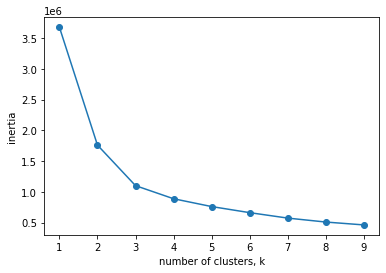

In [12]:
ks = range(1, 10)
inertias = []
from sklearn.cluster import KMeans
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [13]:
# To try with 3
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df1)

# Create a DataFrame with labels and varieties as columns: df
df2 = pd.DataFrame({'labels': labels, 'Res/No_Res': df1.index.tolist()})

# Create crosstab: ct
ct1 = pd.crosstab(df2['labels'], df2['Res/No_Res'])

# Display ct
print(ct1)

Res/No_Res  BRA-002-LOMA__RES  BRA-005-JEMA__RES  BRA-006-NOWA__RES  \
labels                                                                
0                           1                  1                  1   
1                           0                  0                  0   
2                           0                  0                  0   

Res/No_Res  BRA-007-SISO__NORES  BRA-011-AGJO__NORES  BRA-020-SIMA__RES  \
labels                                                                    
0                             0                    0                  1   
1                             1                    1                  0   
2                             0                    0                  0   

Res/No_Res  CHL-001-ROEL__RES  CHL-003-CASE__NORES  CHL-007-SECA__RES  \
labels                                                                  
0                           1                    0                  0   
1                           0                    

In [14]:
# To try with 2
# Create a KMeans model with 2 clusters: model
model = KMeans(n_clusters=2)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df1)

# Create a DataFrame with labels and varieties as columns: df
df4 = pd.DataFrame({'labels': labels, 'Res/No_Res': df1.index.tolist()})

# Create crosstab: ct
ct2 = pd.crosstab(df4['labels'], df4['Res/No_Res'])

# Display ct
print(ct2)

Res/No_Res  BRA-002-LOMA__RES  BRA-005-JEMA__RES  BRA-006-NOWA__RES  \
labels                                                                
0                           0                  0                  0   
1                           1                  1                  1   

Res/No_Res  BRA-007-SISO__NORES  BRA-011-AGJO__NORES  BRA-020-SIMA__RES  \
labels                                                                    
0                             1                    1                  0   
1                             0                    0                  1   

Res/No_Res  CHL-001-ROEL__RES  CHL-003-CASE__NORES  CHL-007-SECA__RES  \
labels                                                                  
0                           0                    1                  1   
1                           1                    0                  0   

Res/No_Res  CHL-008-HERO__RES  CHL-009-ARMA__NORES  CHL-010-LOEN__RES  \
labels                                          

In [15]:
# To try with 4
# Create a KMeans model with 2 clusters: model
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df1)

# Create a DataFrame with labels and varieties as columns: df
df5 = pd.DataFrame({'labels': labels, 'Res/No_Res': df1.index.tolist()})

# Create crosstab: ct
ct3 = pd.crosstab(df5['labels'], df5['Res/No_Res'])

# Display ct
print(ct3)

Res/No_Res  BRA-002-LOMA__RES  BRA-005-JEMA__RES  BRA-006-NOWA__RES  \
labels                                                                
0                           0                  0                  0   
1                           1                  1                  1   
2                           0                  0                  0   
3                           0                  0                  0   

Res/No_Res  BRA-007-SISO__NORES  BRA-011-AGJO__NORES  BRA-020-SIMA__RES  \
labels                                                                    
0                             0                    0                  0   
1                             0                    0                  1   
2                             1                    1                  0   
3                             0                    0                  0   

Res/No_Res  CHL-001-ROEL__RES  CHL-003-CASE__NORES  CHL-007-SECA__RES  \
labels                                           

The usage of all 2,3 and 4 number of clusters do not cluster well because the features have different variances.
Standardscaler is used to transform each feature to have a mean of zero and a variance of 1 i.e removing the mean and scaling to unit variance

In [16]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(df1)

# Calculate the cluster labels: labels
labels = pipeline.predict(df1)

# Create a DataFrame with labels and species as columns: df
df6 = pd.DataFrame({'labels': labels, 'Res/No_Res': df1.index.tolist()})

# Create crosstab: ct
ct4 = pd.crosstab(df6['labels'], df6['Res/No_Res'])

print(ct4)

Res/No_Res  BRA-002-LOMA__RES  BRA-005-JEMA__RES  BRA-006-NOWA__RES  \
labels                                                                
0                           0                  0                  0   
1                           1                  1                  1   
2                           0                  0                  0   

Res/No_Res  BRA-007-SISO__NORES  BRA-011-AGJO__NORES  BRA-020-SIMA__RES  \
labels                                                                    
0                             1                    1                  0   
1                             0                    0                  1   
2                             0                    0                  0   

Res/No_Res  CHL-001-ROEL__RES  CHL-003-CASE__NORES  CHL-007-SECA__RES  \
labels                                                                  
0                           0                    0                  1   
1                           1                    

We'll try to use the normalizer scale to check if that would be a better transformer.
Normalizer() rescales each sample - independently of the other.  

In [99]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=3)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(df1)

# Predict the cluster labels: labels
labels = pipeline.predict(df1)

# Create a DataFrame aligning labels and companies: df
df7 = pd.DataFrame({'labels': labels, 'Res/No_Res': df1.index.tolist()})
sort_values = df7.sort_values('labels')

# Display df sorted by cluster label
print(sort_values.shape)
ct6 = pd.crosstab(df7['labels'], df7['Res/No_Res'])
print(ct6)
print(sort_values)


(141, 2)
Res/No_Res  BRA-002-LOMA__RES  BRA-005-JEMA__RES  BRA-006-NOWA__RES  \
labels                                                                
0                           0                  0                  0   
1                           0                  0                  0   
2                           1                  1                  1   

Res/No_Res  BRA-007-SISO__NORES  BRA-011-AGJO__NORES  BRA-020-SIMA__RES  \
labels                                                                    
0                             0                    0                  0   
1                             1                    1                  0   
2                             0                    0                  1   

Res/No_Res  CHL-001-ROEL__RES  CHL-003-CASE__NORES  CHL-007-SECA__RES  \
labels                                                                  
0                           0                    0                  0   
1                           0           

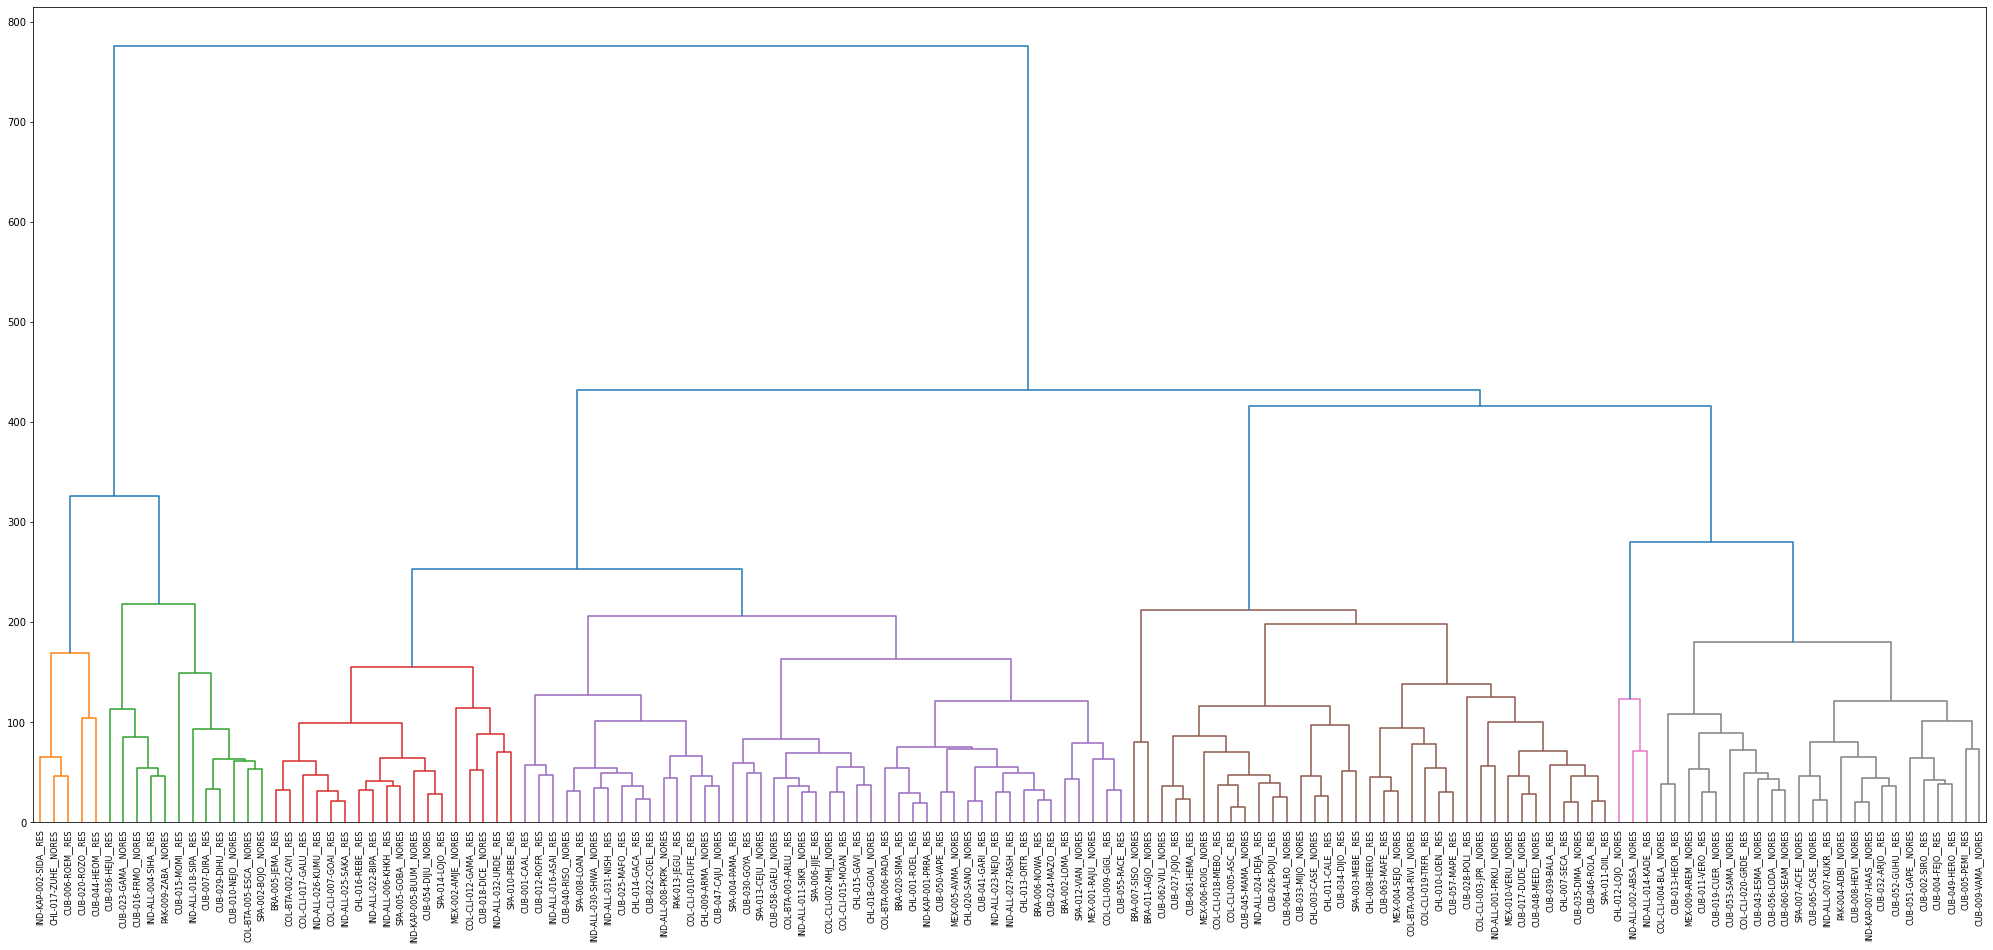

In [18]:
# Calculate the distance between each sample
# linkage method defines how the distance between clusters is measured 
# In complete linkage, the distance between clusters is the distance between the furthest points of the clusters
# In single linkage, the distance between clusters is the distance between the closest points of the clusters.

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(df1, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(35,15))
dendrogram(mergings,
           labels=df1.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.show()
#Z = hierarchy.linkage(df1, 'ward')

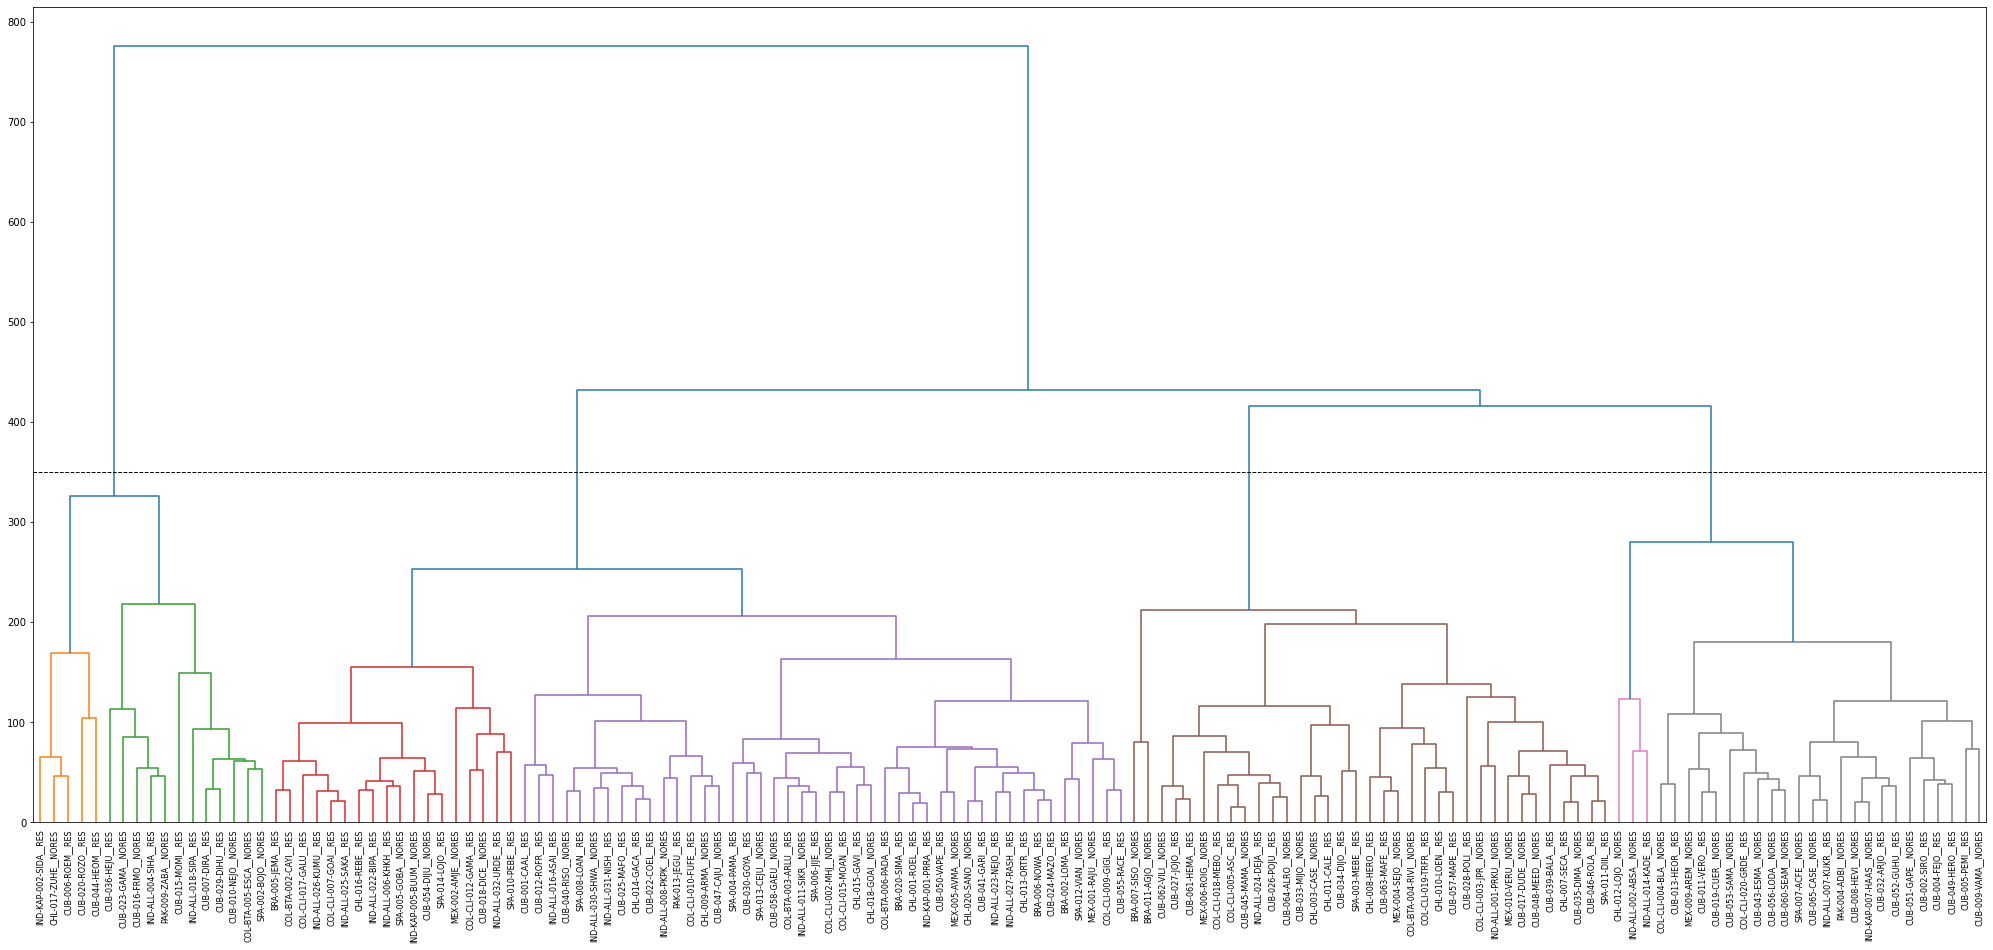

In [19]:
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(35,15))
dendrogram(mergings,
           labels=df1.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.axhline(y=350, c='black', lw=1, linestyle='dashed')
plt.show()

In [20]:
# reshuffled the dataframe to confirm accuarcy of HC
df_shuf = df1.sample(frac=1)
df_shuf

,ACEI_or_ARB,Age,CAD,Concordance,DM,ECG_pre_QRSd,Gender,HTN,LBBB,MI,NYHA,Race,SPECT_pre_EDE,SPECT_pre_EDSI,SPECT_pre_EDV,SPECT_pre_ESE,SPECT_pre_ESSI,SPECT_pre_ESV,SPECT_pre_LVEF,SPECT_pre_PBW,SPECT_pre_PSD,Smoking,SPECT_pre_50scar
New_ID,,,,,,,,,,,,,,,,,,,,,,,
CUB-019-CUER__NORES,0.0,47.0,False,0.0,0.0,200.0,1.0,1.0,1.0,0.0,3.0,3,0.667853,0.744293,307.0,0.626023,0.779805,240.0,22.0,230.0,62.810097,0.0,16.0
IND-ALL-002-ABSA__NORES,1.0,58.0,True,0.0,0.0,150.0,1.0,1.0,1.0,1.0,3.0,5,0.641020,0.767524,198.0,0.692254,0.721654,132.0,33.0,289.0,76.836783,0.0,68.0
SPA-008-LOAN__RES,1.0,55.0,False,0.0,0.0,160.0,0.0,0.0,1.0,0.0,3.0,3,0.642748,0.766078,155.0,0.647274,0.762258,123.0,20.0,176.0,52.646581,1.0,6.0
IND-ALL-027-RASH__RES,1.0,52.0,False,0.0,0.0,170.0,1.0,0.0,1.0,0.0,2.0,5,0.630177,0.776452,161.0,0.638697,0.769458,112.0,30.0,80.0,28.521976,0.0,35.0
CUB-007-DIRA__RES,1.0,47.0,False,1.0,0.0,200.0,1.0,1.0,1.0,0.0,4.0,4,0.578479,0.815697,454.0,0.439114,0.898431,356.0,21.0,220.0,60.381474,0.0,37.0
COL-CLI-019-TRFR__RES,1.0,45.0,False,0.0,0.0,150.0,1.0,1.0,1.0,0.0,3.0,4,0.411046,0.911614,341.0,0.369116,0.929383,278.0,18.0,109.0,45.686811,0.0,8.0
CUB-039-BALA__RES,1.0,60.0,False,1.0,0.0,185.0,1.0,1.0,1.0,0.0,3.0,1,0.602328,0.798249,334.0,0.585939,0.810355,255.0,24.0,183.0,55.537849,0.0,10.0
COL-BTA-002-CAYI__RES,1.0,44.0,False,0.0,0.0,170.0,0.0,0.0,1.0,0.0,2.0,4,0.723737,0.690076,167.0,0.685762,0.727826,105.0,37.0,45.0,16.864904,1.0,10.0
CHL-003-CASE__NORES,1.0,57.0,False,0.0,0.0,160.0,1.0,1.0,1.0,0.0,2.0,4,0.605527,0.795825,320.0,0.528507,0.848929,229.0,29.0,98.0,34.427662,0.0,26.0


In [21]:
# part of the reshuffling process
df_shuf1 = df1.sample(frac=1).reset_index(drop=True)
df_shuf1 = df.set_index('New_ID', inplace=False)
df_shuf1

,ACEI_or_ARB,Age,CAD,Concordance,DM,ECG_pre_QRSd,Gender,HTN,LBBB,MI,NYHA,Race,SPECT_pre_EDE,SPECT_pre_EDSI,SPECT_pre_EDV,SPECT_pre_ESE,SPECT_pre_ESSI,SPECT_pre_ESV,SPECT_pre_LVEF,SPECT_pre_PBW,SPECT_pre_PSD,Smoking,SPECT_pre_50scar
New_ID,,,,,,,,,,,,,,,,,,,,,,,
BRA-002-LOMA__RES,1.0,59.0,False,0.0,0.0,220.0,0.0,0.0,1.0,0.0,4.0,4,0.683490,0.729960,178.0,0.708673,0.705537,110.0,38.0,145.0,55.232853,0.0,17.0
BRA-005-JEMA__RES,1.0,59.0,True,1.0,0.0,147.0,0.0,1.0,1.0,0.0,2.0,1,0.744173,0.667987,160.0,0.738468,0.674288,108.0,33.0,35.0,12.031148,0.0,19.0
BRA-006-NOWA__RES,1.0,77.0,True,0.0,1.0,160.0,0.0,1.0,1.0,1.0,4.0,1,0.527462,0.849579,165.0,0.561512,0.827469,114.0,31.0,79.0,29.027896,0.0,4.0
BRA-007-SISO__NORES,1.0,64.0,True,0.0,1.0,240.0,0.0,1.0,1.0,1.0,3.0,4,0.357251,0.934008,358.0,0.474014,0.880517,257.0,28.0,54.0,23.042593,0.0,25.0
BRA-011-AGJO__NORES,0.0,67.0,True,0.0,1.0,190.0,1.0,1.0,1.0,1.0,3.0,4,0.294617,0.955616,404.0,0.624586,0.780956,286.0,29.0,27.0,10.160424,0.0,38.0
BRA-020-SIMA__RES,1.0,68.0,False,0.0,0.0,220.0,0.0,0.0,1.0,1.0,3.0,3,0.474353,0.880335,192.0,0.556667,0.830736,137.0,29.0,96.0,38.790398,0.0,11.0
CHL-001-ROEL__RES,1.0,76.0,False,0.0,1.0,200.0,0.0,1.0,1.0,0.0,3.0,4,0.416779,0.909008,204.0,0.605535,0.795819,147.0,28.0,104.0,39.397910,0.0,21.0
CHL-003-CASE__NORES,1.0,57.0,False,0.0,0.0,160.0,1.0,1.0,1.0,0.0,2.0,4,0.605527,0.795825,320.0,0.528507,0.848929,229.0,29.0,98.0,34.427662,0.0,26.0
CHL-007-SECA__RES,1.0,67.0,False,1.0,1.0,160.0,1.0,1.0,1.0,0.0,4.0,4,0.604273,0.796777,322.0,0.575782,0.817604,263.0,18.0,147.0,50.283778,0.0,35.0


In [22]:
# converted the dataframe to list to be used as labels for the HC
df_shuf.index.tolist()

['CUB-019-CUER__NORES',
 'IND-ALL-002-ABSA__NORES',
 'SPA-008-LOAN__RES',
 'IND-ALL-027-RASH__RES',
 'CUB-007-DIRA__RES',
 'COL-CLI-019-TRFR__RES',
 'CUB-039-BALA__RES',
 'COL-BTA-002-CAYI__RES',
 'CHL-003-CASE__NORES',
 'CUB-011-VERO__RES',
 'CHL-010-LOEN__RES',
 'COL-CLI-007-GOAI__RES',
 'SPA-012-VIAN__NORES',
 'CUB-063-MAFE__RES',
 'IND-ALL-032-URDE__RES',
 'CUB-064-ALRO__NORES',
 'SPA-011-DIIL__RES',
 'COL-BTA-004-RIVI__NORES',
 'CHL-020-SANO__NORES',
 'BRA-020-SIMA__RES',
 'MEX-001-RAJU__NORES',
 'CUB-002-SIRO__RES',
 'CUB-052-GUHU__RES',
 'CUB-029-DIHU__RES',
 'CUB-033-MIJO__NORES',
 'CUB-024-MAZO__RES',
 'CUB-057-MAPE__RES',
 'IND-ALL-016-ASAI__RES',
 'CHL-009-ARMA__NORES',
 'MEX-002-AMJE__NORES',
 'CUB-040-RISO__NORES',
 'CHL-017-ZUHE__NORES',
 'CUB-016-FRMO__NORES',
 'CUB-045-MAMA__NORES',
 'SPA-005-GOBA__NORES',
 'IND-ALL-031-NISH__RES',
 'CUB-027-JOJO__RES',
 'COL-CLI-002-MHJ__NORES',
 'CUB-035-DIMA__NORES',
 'CUB-060-SEAM__NORES',
 'CUB-005-PEMI__RES',
 'CUB-050-VAPE__RES',

In [23]:
# conversion of dataframe column to list to be used as labels for the HC
df_shuf1.index.tolist()

['BRA-002-LOMA__RES',
 'BRA-005-JEMA__RES',
 'BRA-006-NOWA__RES',
 'BRA-007-SISO__NORES',
 'BRA-011-AGJO__NORES',
 'BRA-020-SIMA__RES',
 'CHL-001-ROEL__RES',
 'CHL-003-CASE__NORES',
 'CHL-007-SECA__RES',
 'CHL-008-HERO__RES',
 'CHL-009-ARMA__NORES',
 'CHL-010-LOEN__RES',
 'CHL-011-CALE__RES',
 'CHL-012-LOJO__NORES',
 'CHL-013-ORTR__RES',
 'CHL-014-GACA__RES',
 'CHL-015-GAVI__RES',
 'CHL-016-REBE__RES',
 'CHL-017-ZUHE__NORES',
 'CHL-018-GOAI__NORES',
 'CHL-020-SANO__NORES',
 'COL-BTA-002-CAYI__RES',
 'COL-BTA-003-ARLU__RES',
 'COL-BTA-004-RIVI__NORES',
 'COL-BTA-005-ESCA__NORES',
 'COL-BTA-006-PADA__RES',
 'COL-CLI-002-MHJ__NORES',
 'COL-CLI-003-JPR__NORES',
 'COL-CLI-004-BLA__NORES',
 'COL-CLI-005-ASC__RES',
 'COL-CLI-007-GOAI__RES',
 'COL-CLI-009-GIGL__RES',
 'COL-CLI-010-FUFE__RES',
 'COL-CLI-012-GAMA__RES',
 'COL-CLI-015-MOAN__RES',
 'COL-CLI-017-GALU__RES',
 'COL-CLI-018-MEBO__RES',
 'COL-CLI-019-TRFR__RES',
 'COL-CLI-020-GRDE__RES',
 'CUB-001-CAAL__RES',
 'CUB-002-SIRO__RES',
 'CU

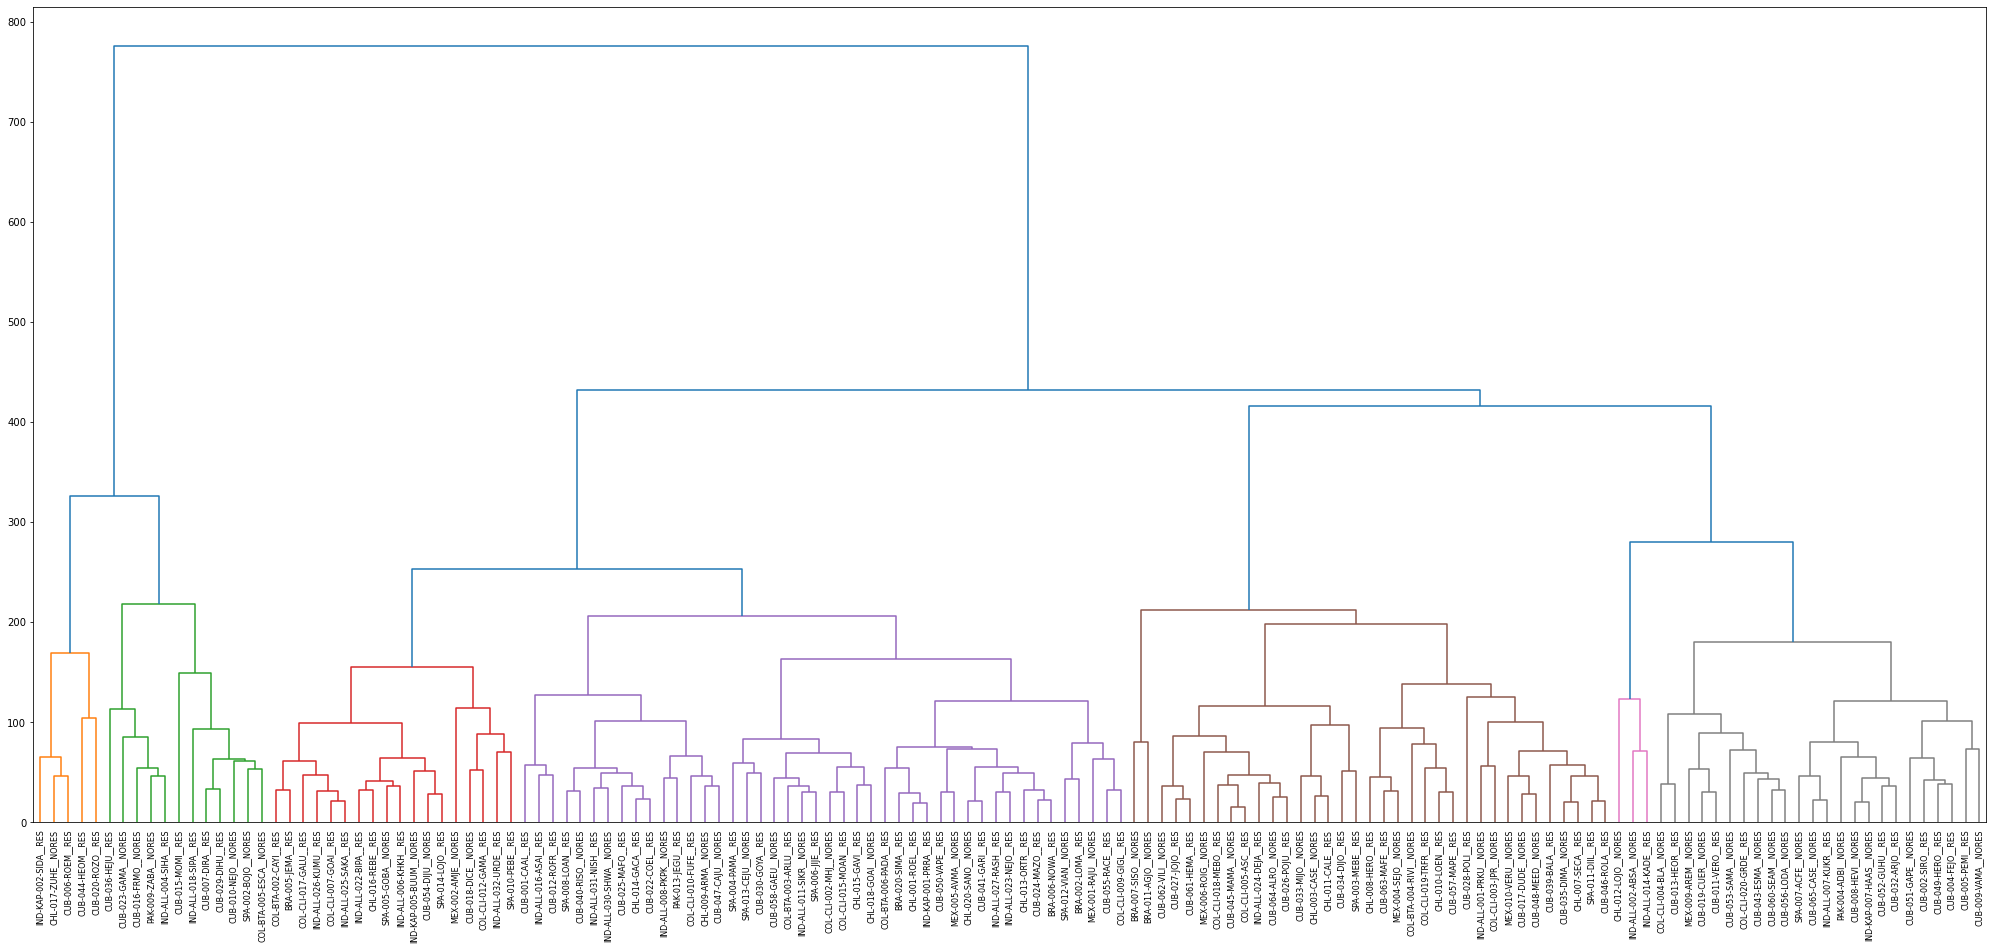

In [24]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings1 = linkage(df_shuf, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(35,15))
dendrogram(mergings1,
           labels=df_shuf.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.show()

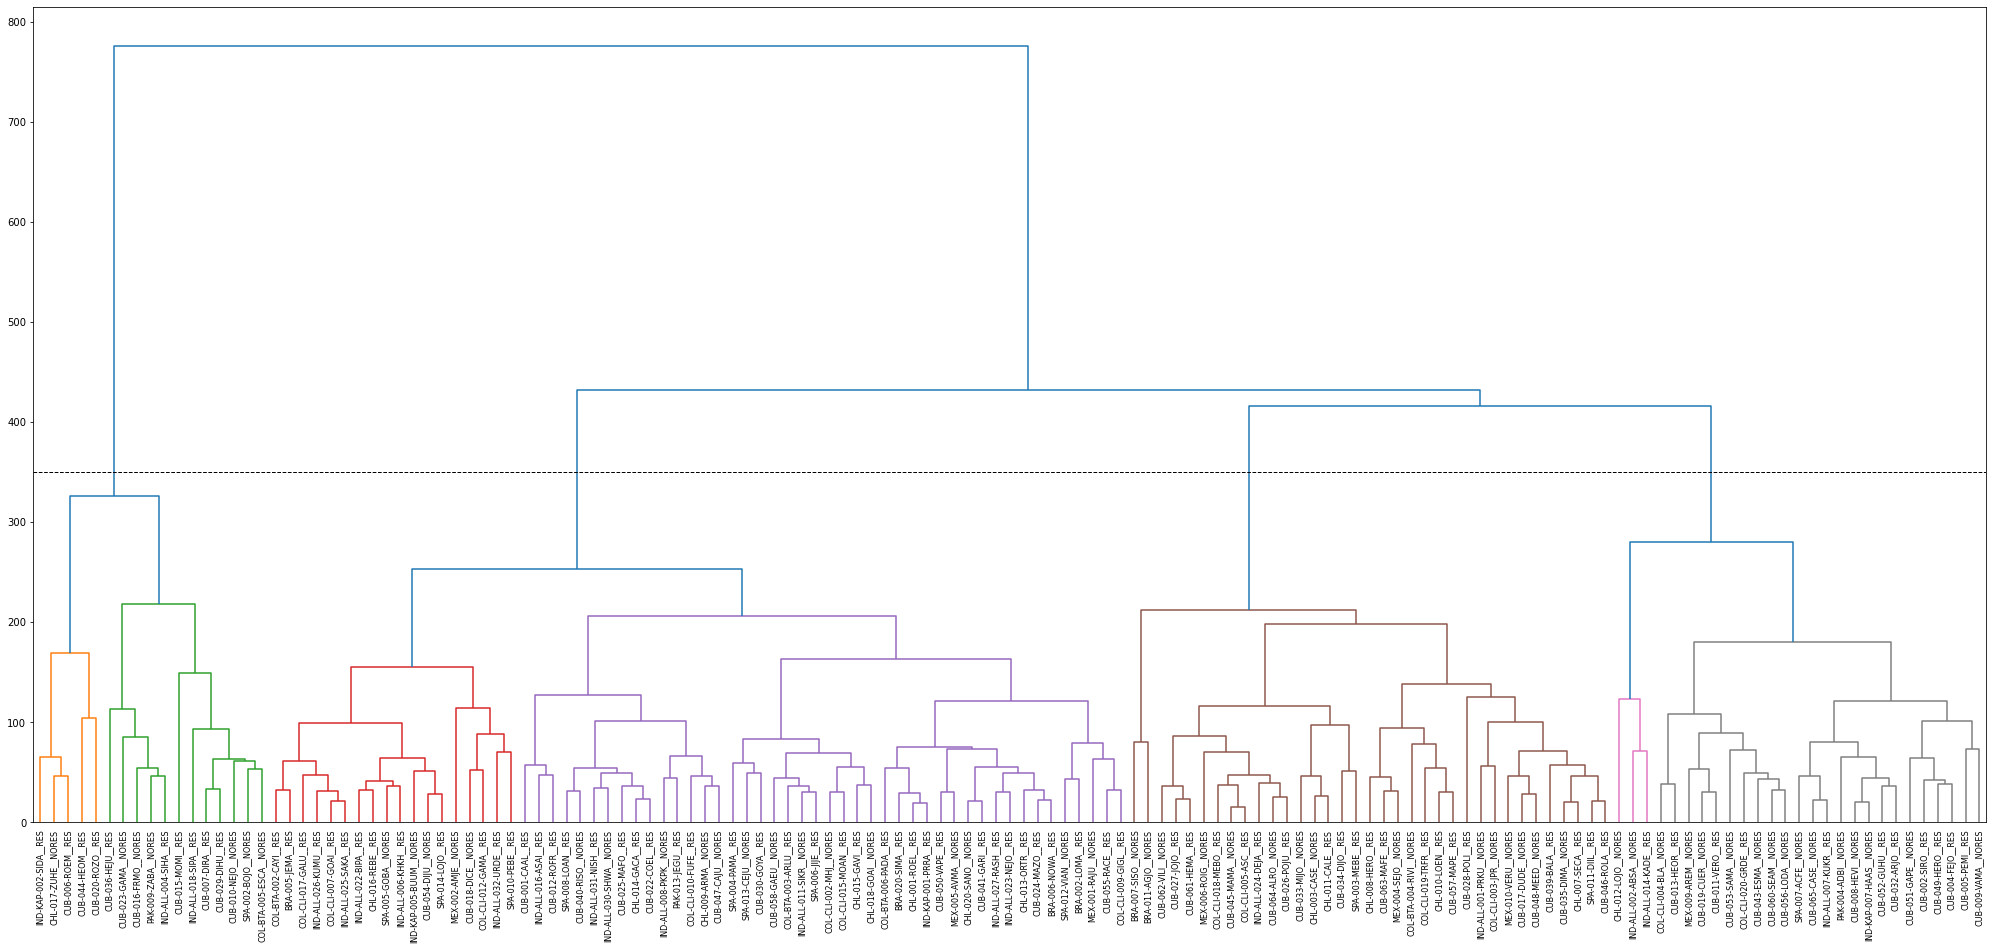

In [25]:
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(35,15))
dendrogram(mergings1,
           labels=df_shuf.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.axhline(y=350, c='black', lw=1, linestyle='dashed')
plt.show()

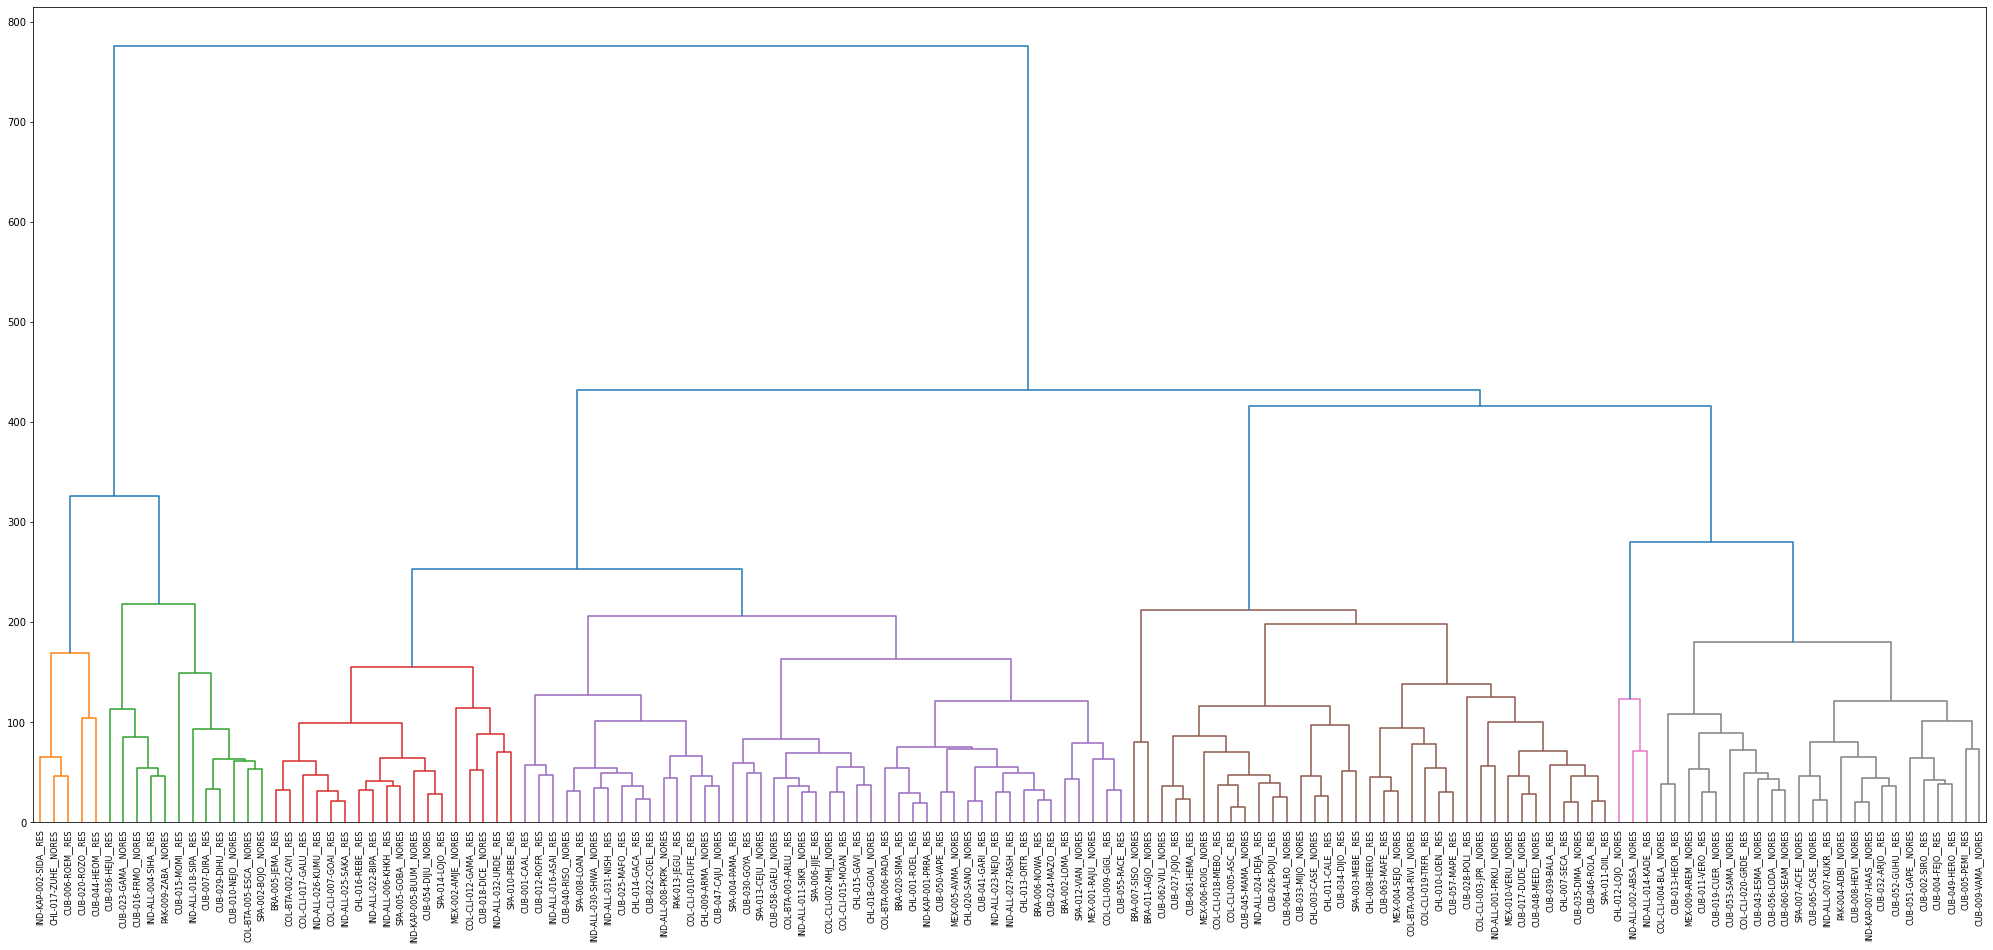

In [26]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings2 = linkage(df_shuf1, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(35,15))
dendrogram(mergings2,
           labels=df_shuf1.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.show()

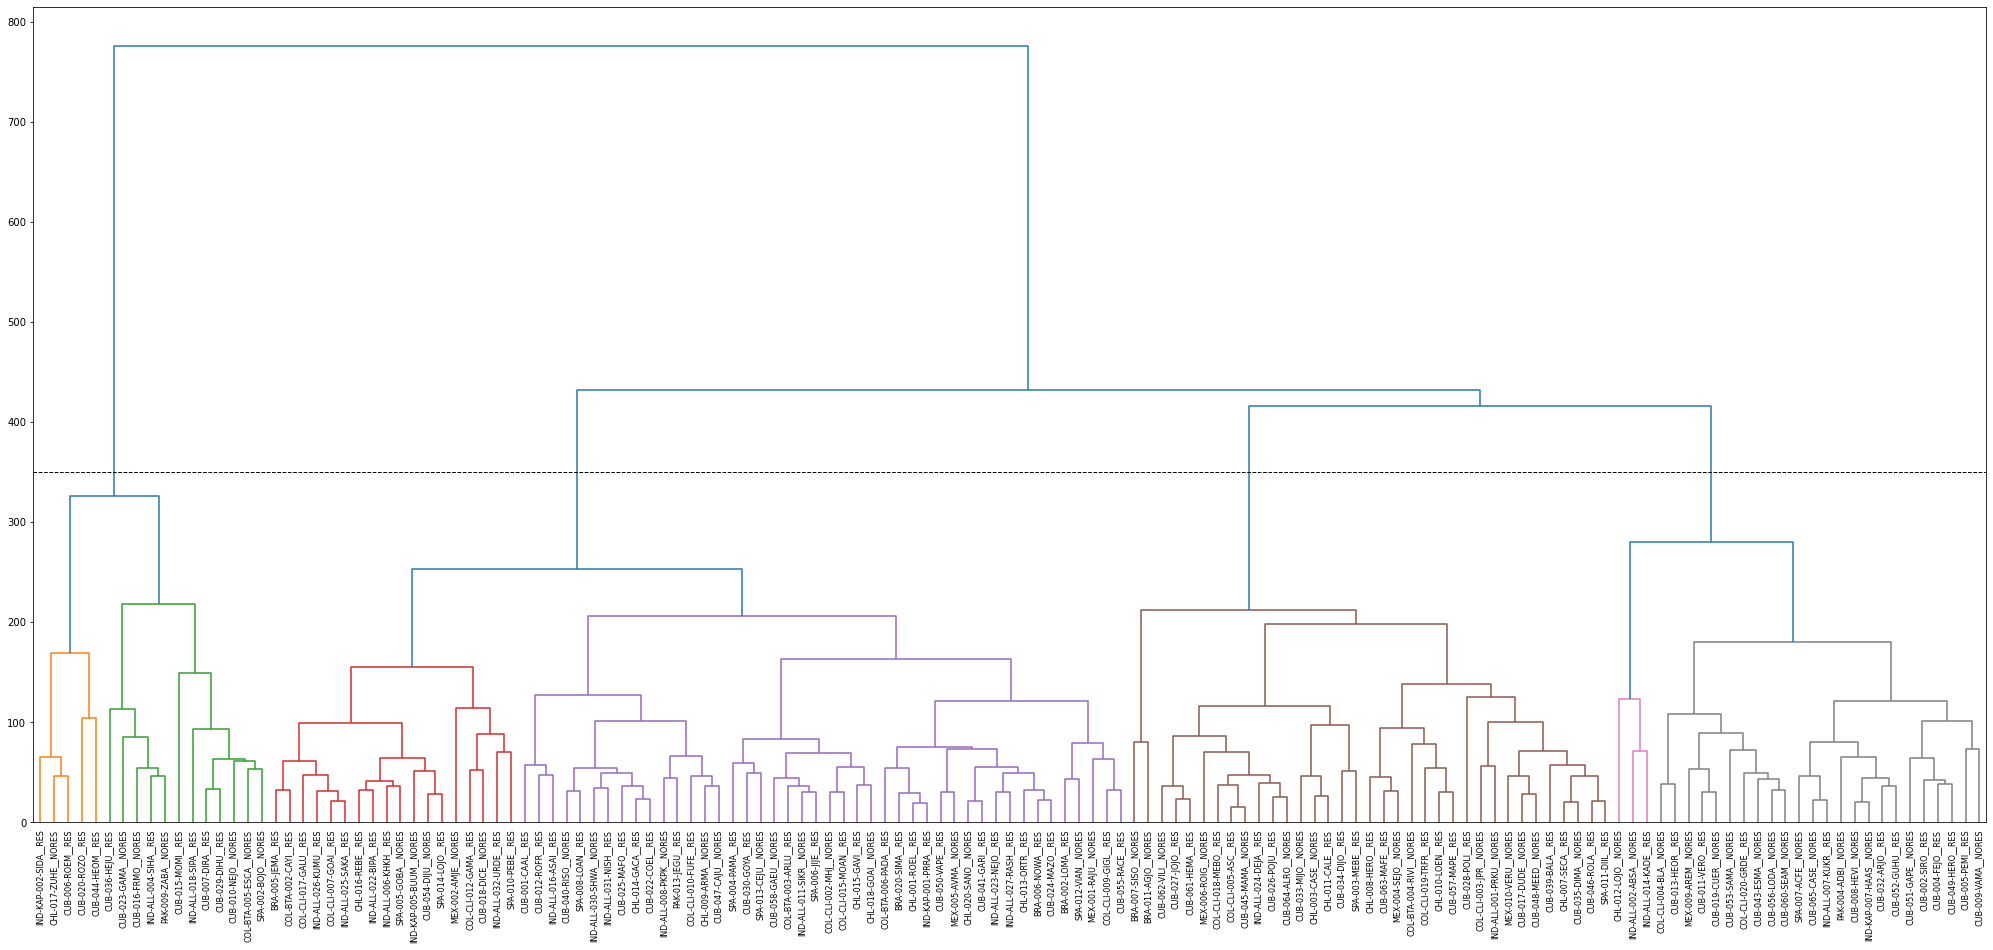

In [27]:
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(35,15))
dendrogram(mergings2,
           labels=df_shuf1.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=8,color_threshold=240)
plt.axhline(y=350, c='black', lw=1, linestyle='dashed')
plt.show()

In [28]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels1 = fcluster(mergings, 350, criterion='distance')
print(labels1)
print(labels1.shape)

[2 2 2 3 3 2 2 3 3 3 2 3 3 4 2 2 2 2 1 2 2 2 2 3 1 2 2 3 4 3 2 2 2 2 2 2 3
 3 4 2 4 4 4 1 1 4 4 1 4 2 4 1 1 3 2 4 1 2 1 2 2 3 3 3 1 2 4 3 3 3 1 3 2 2
 4 1 3 3 2 3 4 2 4 4 4 2 2 4 3 2 4 3 3 3 3 4 3 4 1 2 4 2 2 4 2 1 2 2 3 2 2
 2 2 2 2 2 1 2 4 2 2 3 2 3 4 3 4 1 2 1 3 2 2 2 4 2 2 3 2 2 2]
(141,)


In [29]:
# Use fcluster to extract labels: labels
labels2 = fcluster(mergings1, 350, criterion='distance')
print(labels2)
print(labels2.shape)

[4 4 2 2 1 3 3 2 3 4 3 2 2 3 2 3 3 3 2 2 2 4 4 1 3 2 3 2 2 2 2 1 1 3 2 2 3
 2 3 4 4 2 2 4 1 4 3 2 2 2 4 4 3 4 4 1 4 2 1 2 4 2 2 2 2 3 2 3 4 3 2 2 1 2
 3 2 1 4 2 3 3 1 2 2 3 2 4 4 1 2 3 2 3 2 1 2 2 1 3 2 2 3 2 3 3 4 3 4 2 2 3
 4 2 1 2 2 2 4 2 2 4 4 1 3 2 2 4 2 2 3 3 2 1 1 2 4 2 2 3 2 3]
(141,)


In [30]:
# Use fcluster to extract labels: labels
labels3 = fcluster(mergings2, 350, criterion='distance')
print(labels3)
print(labels3.shape)

[2 2 2 3 3 2 2 3 3 3 2 3 3 4 2 2 2 2 1 2 2 2 2 3 1 2 2 3 4 3 2 2 2 2 2 2 3
 3 4 2 4 4 4 1 1 4 4 1 4 2 4 1 1 3 2 4 1 2 1 2 2 3 3 3 1 2 4 3 3 3 1 3 2 2
 4 1 3 3 2 3 4 2 4 4 4 2 2 4 3 2 4 3 3 3 3 4 3 4 1 2 4 2 2 4 2 1 2 2 3 2 2
 2 2 2 2 2 1 2 4 2 2 3 2 3 4 3 4 1 2 1 3 2 2 2 4 2 2 3 2 2 2]
(141,)


In [31]:
# Create a DataFrame with labels and Response/No_response as columns: df
df2 = pd.DataFrame({'LABELS': labels1, 'Res/No_Res': df1.index.tolist()})
arranged_labels = df2.sort_values('LABELS')

arranged_labels


,LABELS,Res/No_Res
70,1,CUB-036-HEJU__RES
51,1,CUB-015-MOMI__RES
56,1,CUB-020-ROZO__RES
58,1,CUB-023-GAMA__NORES
47,1,CUB-010-NEJO__NORES
44,1,CUB-007-DIRA__RES
43,1,CUB-006-ROEM__RES
64,1,CUB-029-DIHU__RES
75,1,CUB-044-HEOM__RES
98,1,IND-ALL-004-SIHA__RES


In [32]:
# Create a DataFrame with labels and Response/No_response as columns: df
df3 = pd.DataFrame({'LABELS': labels2, 'Res/No_Res': df_shuf.index.tolist()})
ar1 = df3.sort_values('LABELS')

ar1

,LABELS,Res/No_Res
44,1,SPA-002-BOJO__NORES
55,1,CUB-010-NEJO__NORES
58,1,PAK-009-ZABA__NORES
122,1,CUB-020-ROZO__RES
32,1,CUB-016-FRMO__NORES
31,1,CHL-017-ZUHE__NORES
23,1,CUB-029-DIHU__RES
113,1,CUB-006-ROEM__RES
72,1,IND-ALL-004-SIHA__RES
97,1,IND-KAP-002-SIDA__RES


In [33]:
# Create a DataFrame with labels and Response/No_response as columns: df
df4 = pd.DataFrame({'LABELS': labels3, 'Res/No_Res': df_shuf1.index.tolist()})
ar2 = df4.sort_values('LABELS')

ar2

,LABELS,Res/No_Res
70,1,CUB-036-HEJU__RES
51,1,CUB-015-MOMI__RES
56,1,CUB-020-ROZO__RES
58,1,CUB-023-GAMA__NORES
47,1,CUB-010-NEJO__NORES
44,1,CUB-007-DIRA__RES
43,1,CUB-006-ROEM__RES
64,1,CUB-029-DIHU__RES
75,1,CUB-044-HEOM__RES
98,1,IND-ALL-004-SIHA__RES


In [34]:
# Create crosstab: ct
ct = pd.crosstab(df2['LABELS'], df2['Res/No_Res'])
# Display ct
ct

Res/No_Res,BRA-002-LOMA__RES,BRA-005-JEMA__RES,BRA-006-NOWA__RES,BRA-007-SISO__NORES,BRA-011-AGJO__NORES,BRA-020-SIMA__RES,CHL-001-ROEL__RES,CHL-003-CASE__NORES,CHL-007-SECA__RES,CHL-008-HERO__RES,CHL-009-ARMA__NORES,CHL-010-LOEN__RES,CHL-011-CALE__RES,CHL-012-LOJO__NORES,CHL-013-ORTR__RES,CHL-014-GACA__RES,CHL-015-GAVI__RES,CHL-016-REBE__RES,CHL-017-ZUHE__NORES,CHL-018-GOAI__NORES,CHL-020-SANO__NORES,COL-BTA-002-CAYI__RES,COL-BTA-003-ARLU__RES,COL-BTA-004-RIVI__NORES,COL-BTA-005-ESCA__NORES,COL-BTA-006-PADA__RES,COL-CLI-002-MHJ__NORES,COL-CLI-003-JPR__NORES,COL-CLI-004-BLA__NORES,COL-CLI-005-ASC__RES,COL-CLI-007-GOAI__RES,COL-CLI-009-GIGL__RES,COL-CLI-010-FUFE__RES,COL-CLI-012-GAMA__RES,COL-CLI-015-MOAN__RES,COL-CLI-017-GALU__RES,COL-CLI-018-MEBO__RES,COL-CLI-019-TRFR__RES,COL-CLI-020-GRDE__RES,CUB-001-CAAL__RES,CUB-002-SIRO__RES,CUB-004-FEJO__RES,CUB-005-PEMI__RES,CUB-006-ROEM__RES,CUB-007-DIRA__RES,CUB-008-HEVI__NORES,CUB-009-VAMA__NORES,CUB-010-NEJO__NORES,CUB-011-VERO__RES,CUB-012-ROFR__RES,CUB-013-HEOR__RES,CUB-015-MOMI__RES,CUB-016-FRMO__NORES,CUB-017-DUDE__NORES,CUB-018-DICE__NORES,CUB-019-CUER__NORES,CUB-020-ROZO__RES,CUB-022-COEL__RES,CUB-023-GAMA__NORES,CUB-024-MAZO__RES,CUB-025-MAFO__RES,CUB-026-POJU__RES,CUB-027-JOJO__RES,CUB-028-POLI__RES,CUB-029-DIHU__RES,CUB-030-GOYA__RES,CUB-032-ARJO__RES,CUB-033-MIJO__NORES,CUB-034-DIJO__RES,CUB-035-DIMA__NORES,CUB-036-HEJU__RES,CUB-039-BALA__RES,CUB-040-RISO__NORES,CUB-041-GARI__RES,CUB-043-ESMA__NORES,CUB-044-HEOM__RES,CUB-045-MAMA__NORES,CUB-046-ROLA__RES,CUB-047-CAJU__NORES,CUB-048-MEED__NORES,CUB-049-HERO__RES,CUB-050-VAPE__RES,CUB-051-GAPE__NORES,CUB-052-GUHU__RES,CUB-053-SAMA__NORES,CUB-054-DIJU__NORES,CUB-055-RACE__RES,CUB-056-LODA__NORES,CUB-057-MAPE__RES,CUB-058-GAEU__NORES,CUB-060-SEAM__NORES,CUB-061-HEMA__RES,CUB-062-VILI__NORES,CUB-063-MAFE__RES,CUB-064-ALRO__NORES,CUB-065-CASE__NORES,IND-ALL-001-PRKU__NORES,IND-ALL-002-ABSA__NORES,IND-ALL-004-SIHA__RES,IND-ALL-006-KHKH__RES,IND-ALL-007-KUKR__RES,IND-ALL-008-PKPK__NORES,IND-ALL-011-SIKR__NORES,IND-ALL-014-KADE__RES,IND-ALL-016-ASAI__RES,IND-ALL-018-SIPA__RES,IND-ALL-022-BIPA__RES,IND-ALL-023-NEJO__RES,IND-ALL-024-DEJA__RES,IND-ALL-025-SAKA__RES,IND-ALL-026-KUMU__RES,IND-ALL-027-RASH__RES,IND-ALL-030-SHWA__NORES,IND-ALL-031-NISH__RES,IND-ALL-032-URDE__RES,IND-KAP-001-PRRA__RES,IND-KAP-002-SIDA__RES,IND-KAP-005-BUUM__NORES,IND-KAP-007-HAAS__NORES,MEX-001-RAJU__NORES,MEX-002-AMJE__NORES,MEX-004-SEJO__NORES,MEX-005-AVMA__NORES,MEX-006-ROIG__NORES,MEX-009-AREM__NORES,MEX-010-VERU__NORES,PAK-004-ADBI__NORES,PAK-009-ZABA__NORES,PAK-013-JEGU__RES,SPA-002-BOJO__NORES,SPA-003-MEBE__RES,SPA-004-PAMA__RES,SPA-005-GOBA__NORES,SPA-006-JIJE__RES,SPA-007-ACFE__NORES,SPA-008-LOAN__RES,SPA-010-PEBE__RES,SPA-011-DIIL__RES,SPA-012-VIAN__NORES,SPA-013-CEJU__NORES,SPA-014-LOJO__RES
LABELS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1,1
3,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0

In [35]:
ar1.describe()

,LABELS
count,141.000000
mean,2.510638
std,0.938213
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [36]:
arranged_labels.describe()

,LABELS
count,141.000000
mean,2.510638
std,0.938213
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [37]:
ar2.describe()

,LABELS
count,141.000000
mean,2.510638
std,0.938213
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [38]:
arranged_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 70 to 97
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LABELS      141 non-null    int32 
 1   Res/No_Res  141 non-null    object
dtypes: int32(1), object(1)
memory usage: 2.8+ KB


In [108]:
lab1 = arranged_labels[(arranged_labels['LABELS']==1)]
print(lab1)
print(lab1.count())

     LABELS               Res/No_Res
70        1        CUB-036-HEJU__RES
51        1        CUB-015-MOMI__RES
56        1        CUB-020-ROZO__RES
58        1      CUB-023-GAMA__NORES
47        1      CUB-010-NEJO__NORES
44        1        CUB-007-DIRA__RES
43        1        CUB-006-ROEM__RES
64        1        CUB-029-DIHU__RES
75        1        CUB-044-HEOM__RES
98        1    IND-ALL-004-SIHA__RES
52        1      CUB-016-FRMO__NORES
24        1  COL-BTA-005-ESCA__NORES
18        1      CHL-017-ZUHE__NORES
116       1    IND-KAP-002-SIDA__RES
105       1    IND-ALL-018-SIPA__RES
127       1      PAK-009-ZABA__NORES
129       1      SPA-002-BOJO__NORES
LABELS        17
Res/No_Res    17
dtype: int64


In [109]:
labb2 = ar2[(ar2['LABELS']==1)]
print(labb2)
print(labb2.count())

     LABELS               Res/No_Res
70        1        CUB-036-HEJU__RES
51        1        CUB-015-MOMI__RES
56        1        CUB-020-ROZO__RES
58        1      CUB-023-GAMA__NORES
47        1      CUB-010-NEJO__NORES
44        1        CUB-007-DIRA__RES
43        1        CUB-006-ROEM__RES
64        1        CUB-029-DIHU__RES
75        1        CUB-044-HEOM__RES
98        1    IND-ALL-004-SIHA__RES
52        1      CUB-016-FRMO__NORES
24        1  COL-BTA-005-ESCA__NORES
18        1      CHL-017-ZUHE__NORES
116       1    IND-KAP-002-SIDA__RES
105       1    IND-ALL-018-SIPA__RES
127       1      PAK-009-ZABA__NORES
129       1      SPA-002-BOJO__NORES
LABELS        17
Res/No_Res    17
dtype: int64


In [110]:
labb1 = ar1[(ar1['LABELS']==1)]
print(labb1)
print(labb1.count())

     LABELS               Res/No_Res
44        1      SPA-002-BOJO__NORES
55        1      CUB-010-NEJO__NORES
58        1      PAK-009-ZABA__NORES
122       1        CUB-020-ROZO__RES
32        1      CUB-016-FRMO__NORES
31        1      CHL-017-ZUHE__NORES
23        1        CUB-029-DIHU__RES
113       1        CUB-006-ROEM__RES
72        1    IND-ALL-004-SIHA__RES
97        1    IND-KAP-002-SIDA__RES
76        1        CUB-044-HEOM__RES
88        1        CUB-015-MOMI__RES
4         1        CUB-007-DIRA__RES
132       1    IND-ALL-018-SIPA__RES
133       1  COL-BTA-005-ESCA__NORES
94        1      CUB-023-GAMA__NORES
81        1        CUB-036-HEJU__RES
LABELS        17
Res/No_Res    17
dtype: int64


In [111]:
# String to be searched in end of string  
search1 ="_NORES"
search2 ="_RES"
  
# boolean series returned with False at place of NaN 
NORES_df1 = lab1["Res/No_Res"].str.endswith(search1, na = False) 
RES_df1 = lab1["Res/No_Res"].str.endswith(search2, na = False)
  
# displaying filtered dataframe 
print(lab1[NORES_df1])
print(lab1[NORES_df1].count())
print('\n')
print(lab1[RES_df1])
print(lab1[RES_df1].count())


     LABELS               Res/No_Res
58        1      CUB-023-GAMA__NORES
47        1      CUB-010-NEJO__NORES
52        1      CUB-016-FRMO__NORES
24        1  COL-BTA-005-ESCA__NORES
18        1      CHL-017-ZUHE__NORES
127       1      PAK-009-ZABA__NORES
129       1      SPA-002-BOJO__NORES
LABELS        7
Res/No_Res    7
dtype: int64


     LABELS             Res/No_Res
70        1      CUB-036-HEJU__RES
51        1      CUB-015-MOMI__RES
56        1      CUB-020-ROZO__RES
44        1      CUB-007-DIRA__RES
43        1      CUB-006-ROEM__RES
64        1      CUB-029-DIHU__RES
75        1      CUB-044-HEOM__RES
98        1  IND-ALL-004-SIHA__RES
116       1  IND-KAP-002-SIDA__RES
105       1  IND-ALL-018-SIPA__RES
LABELS        10
Res/No_Res    10
dtype: int64


In [112]:
#clus1= df1[df1['New_ID'].isin([lab1])]
#clus1 = df[df['New_ID']==lab1]
print(lab1.shape)
lab1 = lab1.set_index('Res/No_Res', inplace=False)
print(lab1.shape)
clus1 = lab1.index.tolist()

clus1

(17, 2)
(17, 1)


['CUB-036-HEJU__RES',
 'CUB-015-MOMI__RES',
 'CUB-020-ROZO__RES',
 'CUB-023-GAMA__NORES',
 'CUB-010-NEJO__NORES',
 'CUB-007-DIRA__RES',
 'CUB-006-ROEM__RES',
 'CUB-029-DIHU__RES',
 'CUB-044-HEOM__RES',
 'IND-ALL-004-SIHA__RES',
 'CUB-016-FRMO__NORES',
 'COL-BTA-005-ESCA__NORES',
 'CHL-017-ZUHE__NORES',
 'IND-KAP-002-SIDA__RES',
 'IND-ALL-018-SIPA__RES',
 'PAK-009-ZABA__NORES',
 'SPA-002-BOJO__NORES']

In [79]:
# To select rows in cluster 1
clus_1 = df1[df1.index.isin(clus1)]
print(clus_1.shape)
print(clus_1)

(17, 23)
                         ACEI_or_ARB   Age    CAD  Concordance   DM  \
New_ID                                                                
CHL-017-ZUHE__NORES              1.0  62.0  False          0.0  0.0   
COL-BTA-005-ESCA__NORES          0.0  46.0  False          0.0  0.0   
CUB-006-ROEM__RES                1.0  51.0  False          0.0  0.0   
CUB-007-DIRA__RES                1.0  47.0  False          1.0  0.0   
CUB-010-NEJO__NORES              0.0  65.0  False          0.0  1.0   
CUB-015-MOMI__RES                1.0  67.0  False          1.0  0.0   
CUB-016-FRMO__NORES              1.0  79.0  False          1.0  0.0   
CUB-020-ROZO__RES                1.0  59.0   True          0.0  1.0   
CUB-023-GAMA__NORES              1.0  58.0  False          0.0  0.0   
CUB-029-DIHU__RES                1.0  43.0  False          1.0  0.0   
CUB-036-HEJU__RES                1.0  66.0  False          0.0  1.0   
CUB-044-HEOM__RES                1.0  51.0  False          1.0  0.0 

In [141]:
# Iterate over many given columns 
# only from the dataframe 
for column in clus_1[['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'NYHA', 'Race','Smoking']]: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = clus_1[column] 
    print('Column Name : ', column) 
    print('Column Count : ', columnSeriesObj.value_counts()) 
    print('Column Percentage : ', columnSeriesObj.value_counts(normalize = True)*100)
    print('\n')

Column Name :  ACEI_or_ARB
Column Count :  1.0    15
0.0     2
Name: ACEI_or_ARB, dtype: int64
Column Percentage :  1.0    88.235294
0.0    11.764706
Name: ACEI_or_ARB, dtype: float64


Column Name :  CAD
Column Count :  False    15
True      2
Name: CAD, dtype: int64
Column Percentage :  False    88.235294
True     11.764706
Name: CAD, dtype: float64


Column Name :  Concordance
Column Count :  0.0    11
1.0     6
Name: Concordance, dtype: int64
Column Percentage :  0.0    64.705882
1.0    35.294118
Name: Concordance, dtype: float64


Column Name :  DM
Column Count :  0.0    12
1.0     5
Name: DM, dtype: int64
Column Percentage :  0.0    70.588235
1.0    29.411765
Name: DM, dtype: float64


Column Name :  Gender
Column Count :  1.0    13
0.0     4
Name: Gender, dtype: int64
Column Percentage :  1.0    76.470588
0.0    23.529412
Name: Gender, dtype: float64


Column Name :  HTN
Column Count :  1.0    10
0.0     7
Name: HTN, dtype: int64
Column Percentage :  1.0    58.823529
0.0    41.1

In [104]:
lab2 = arranged_labels[(arranged_labels['LABELS']==2)]
print(lab2.count())
print(lab2.shape)
print(lab2)
#print(lab2.count())

LABELS        62
Res/No_Res    62
dtype: int64
(62, 2)
     LABELS               Res/No_Res
115       2    IND-KAP-001-PRRA__RES
128       2        PAK-013-JEGU__RES
73        2        CUB-041-GARI__RES
72        2      CUB-040-RISO__NORES
139       2      SPA-013-CEJU__NORES
65        2        CUB-030-GOYA__RES
78        2      CUB-047-CAJU__NORES
131       2        SPA-004-PAMA__RES
60        2        CUB-025-MAFO__RES
59        2        CUB-024-MAZO__RES
133       2        SPA-006-JIJE__RES
135       2        SPA-008-LOAN__RES
57        2        CUB-022-COEL__RES
136       2        SPA-010-PEBE__RES
138       2      SPA-012-VIAN__NORES
132       2      SPA-005-GOBA__NORES
81        2        CUB-050-VAPE__RES
85        2      CUB-054-DIJU__NORES
86        2        CUB-055-RACE__RES
114       2    IND-ALL-032-URDE__RES
113       2    IND-ALL-031-NISH__RES
119       2      MEX-001-RAJU__NORES
112       2  IND-ALL-030-SHWA__NORES
111       2    IND-ALL-027-RASH__RES
110       2    IND-A

In [92]:
# String to be searched in end of string  
search1 ="_NORES"
search2 ="_RES"
  
# boolean series returned with False at place of NaN 
NORES_df2 = lab2["Res/No_Res"].str.endswith(search1, na = False) 
RES_df2 = lab2["Res/No_Res"].str.endswith(search2, na = False)
  
# displaying filtered dataframe 
print(lab2[NORES_df2])
print(lab2[NORES_df2].count())
print('\n')
print(lab2[RES_df2])
print(lab2[RES_df2].count())

     LABELS               Res/No_Res
72        2      CUB-040-RISO__NORES
139       2      SPA-013-CEJU__NORES
78        2      CUB-047-CAJU__NORES
138       2      SPA-012-VIAN__NORES
132       2      SPA-005-GOBA__NORES
85        2      CUB-054-DIJU__NORES
119       2      MEX-001-RAJU__NORES
112       2  IND-ALL-030-SHWA__NORES
117       2  IND-KAP-005-BUUM__NORES
122       2      MEX-005-AVMA__NORES
102       2  IND-ALL-011-SIKR__NORES
101       2  IND-ALL-008-PKPK__NORES
89        2      CUB-058-GAEU__NORES
120       2      MEX-002-AMJE__NORES
54        2      CUB-018-DICE__NORES
10        2      CHL-009-ARMA__NORES
26        2   COL-CLI-002-MHJ__NORES
20        2      CHL-020-SANO__NORES
19        2      CHL-018-GOAI__NORES
LABELS        19
Res/No_Res    19
dtype: int64


     LABELS             Res/No_Res
115       2  IND-KAP-001-PRRA__RES
128       2      PAK-013-JEGU__RES
73        2      CUB-041-GARI__RES
65        2      CUB-030-GOYA__RES
131       2      SPA-004-PAMA__RES
6

In [106]:
print(lab2.shape)
lab2 = lab2.set_index("Res/No_Res", inplace=False)
print(lab2.shape)
clus2 = lab2.index.tolist()
#print(clus2.count())
clus2

(62, 2)
(62, 1)


In [113]:
# To select rows in cluster 2
clus_2 = df1[df1.index.isin(clus2)]
print(clus_2.shape)
print(clus_2)

(62, 23)
                         ACEI_or_ARB   Age    CAD  Concordance   DM  \
New_ID                                                                
BRA-002-LOMA__RES                1.0  59.0  False          0.0  0.0   
BRA-005-JEMA__RES                1.0  59.0   True          1.0  0.0   
BRA-006-NOWA__RES                1.0  77.0   True          0.0  1.0   
BRA-020-SIMA__RES                1.0  68.0  False          0.0  0.0   
CHL-001-ROEL__RES                1.0  76.0  False          0.0  1.0   
CHL-009-ARMA__NORES              1.0  50.0  False          0.0  0.0   
CHL-013-ORTR__RES                1.0  74.0  False          0.0  1.0   
CHL-014-GACA__RES                1.0  76.0   True          0.0  1.0   
CHL-015-GAVI__RES                1.0  53.0  False          0.0  0.0   
CHL-016-REBE__RES                1.0  78.0   True          1.0  1.0   
CHL-018-GOAI__NORES              1.0  61.0  False          0.0  0.0   
CHL-020-SANO__NORES              1.0  44.0   True          0.0  0.0 

In [142]:
# Iterate over many given columns 
# only from the dataframe 
for column in clus_2[['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'NYHA', 'Race','Smoking']]: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = clus_2[column] 
    print('Column Name : ', column) 
    print('Column Count : ', columnSeriesObj.value_counts()) 
    print('Column Percentage : ', columnSeriesObj.value_counts(normalize = True)*100)
    print('\n')

Column Name :  ACEI_or_ARB
Column Count :  1.0    55
0.0     7
Name: ACEI_or_ARB, dtype: int64
Column Percentage :  1.0    88.709677
0.0    11.290323
Name: ACEI_or_ARB, dtype: float64


Column Name :  CAD
Column Count :  False    47
True     15
Name: CAD, dtype: int64
Column Percentage :  False    75.806452
True     24.193548
Name: CAD, dtype: float64


Column Name :  Concordance
Column Count :  0.0    49
1.0    13
Name: Concordance, dtype: int64
Column Percentage :  0.0    79.032258
1.0    20.967742
Name: Concordance, dtype: float64


Column Name :  DM
Column Count :  0.0    45
1.0    17
Name: DM, dtype: int64
Column Percentage :  0.0    72.580645
1.0    27.419355
Name: DM, dtype: float64


Column Name :  Gender
Column Count :  0.0    37
1.0    25
Name: Gender, dtype: int64
Column Percentage :  0.0    59.677419
1.0    40.322581
Name: Gender, dtype: float64


Column Name :  HTN
Column Count :  1.0    31
0.0    31
Name: HTN, dtype: int64
Column Percentage :  1.0    50.0
0.0    50.0
Name

In [114]:
lab3 = arranged_labels[(arranged_labels['LABELS']==3)]
print(lab3)
print(lab3.count())

     LABELS               Res/No_Res
53        3      CUB-017-DUDE__NORES
4         3      BRA-011-AGJO__NORES
121       3      MEX-004-SEJO__NORES
29        3     COL-CLI-005-ASC__RES
11        3        CHL-010-LOEN__RES
12        3        CHL-011-CALE__RES
130       3        SPA-003-MEBE__RES
96        3  IND-ALL-001-PRKU__NORES
23        3  COL-BTA-004-RIVI__NORES
108       3    IND-ALL-024-DEJA__RES
62        3        CUB-027-JOJO__RES
61        3        CUB-026-POJU__RES
3         3      BRA-007-SISO__NORES
137       3        SPA-011-DIIL__RES
27        3   COL-CLI-003-JPR__NORES
63        3        CUB-028-POLI__RES
67        3      CUB-033-MIJO__NORES
93        3        CUB-063-MAFE__RES
36        3    COL-CLI-018-MEBO__RES
79        3      CUB-048-MEED__NORES
8         3        CHL-007-SECA__RES
71        3        CUB-039-BALA__RES
9         3        CHL-008-HERO__RES
94        3      CUB-064-ALRO__NORES
37        3    COL-CLI-019-TRFR__RES
125       3      MEX-010-VERU__NORES
6

In [115]:
# String to be searched in end of string  
search1 ="_NORES"
search2 ="_RES"
  
# boolean series returned with False at place of NaN 
NORES_df3 = lab3["Res/No_Res"].str.endswith(search1, na = False) 
RES_df3 = lab3["Res/No_Res"].str.endswith(search2, na = False)
  
# displaying filtered dataframe 
print(lab3[NORES_df3])
print(lab3[NORES_df3].count())
print('\n')
print(lab3[RES_df3])
print(lab3[RES_df3].count())

     LABELS               Res/No_Res
53        3      CUB-017-DUDE__NORES
4         3      BRA-011-AGJO__NORES
121       3      MEX-004-SEJO__NORES
96        3  IND-ALL-001-PRKU__NORES
23        3  COL-BTA-004-RIVI__NORES
3         3      BRA-007-SISO__NORES
27        3   COL-CLI-003-JPR__NORES
67        3      CUB-033-MIJO__NORES
79        3      CUB-048-MEED__NORES
94        3      CUB-064-ALRO__NORES
125       3      MEX-010-VERU__NORES
69        3      CUB-035-DIMA__NORES
7         3      CHL-003-CASE__NORES
123       3      MEX-006-ROIG__NORES
92        3      CUB-062-VILI__NORES
76        3      CUB-045-MAMA__NORES
LABELS        16
Res/No_Res    16
dtype: int64


     LABELS             Res/No_Res
29        3   COL-CLI-005-ASC__RES
11        3      CHL-010-LOEN__RES
12        3      CHL-011-CALE__RES
130       3      SPA-003-MEBE__RES
108       3  IND-ALL-024-DEJA__RES
62        3      CUB-027-JOJO__RES
61        3      CUB-026-POJU__RES
137       3      SPA-011-DIIL__RES
63     

In [116]:
print(lab3.shape)
lab3 = lab3.set_index("Res/No_Res", inplace=False)
print(lab3.shape)
clus3 = lab3.index.tolist()
#print(clus3.count())
clus3

(35, 2)
(35, 1)


['CUB-017-DUDE__NORES',
 'BRA-011-AGJO__NORES',
 'MEX-004-SEJO__NORES',
 'COL-CLI-005-ASC__RES',
 'CHL-010-LOEN__RES',
 'CHL-011-CALE__RES',
 'SPA-003-MEBE__RES',
 'IND-ALL-001-PRKU__NORES',
 'COL-BTA-004-RIVI__NORES',
 'IND-ALL-024-DEJA__RES',
 'CUB-027-JOJO__RES',
 'CUB-026-POJU__RES',
 'BRA-007-SISO__NORES',
 'SPA-011-DIIL__RES',
 'COL-CLI-003-JPR__NORES',
 'CUB-028-POLI__RES',
 'CUB-033-MIJO__NORES',
 'CUB-063-MAFE__RES',
 'COL-CLI-018-MEBO__RES',
 'CUB-048-MEED__NORES',
 'CHL-007-SECA__RES',
 'CUB-039-BALA__RES',
 'CHL-008-HERO__RES',
 'CUB-064-ALRO__NORES',
 'COL-CLI-019-TRFR__RES',
 'MEX-010-VERU__NORES',
 'CUB-035-DIMA__NORES',
 'CHL-003-CASE__NORES',
 'CUB-057-MAPE__RES',
 'CUB-034-DIJO__RES',
 'MEX-006-ROIG__NORES',
 'CUB-061-HEMA__RES',
 'CUB-062-VILI__NORES',
 'CUB-046-ROLA__RES',
 'CUB-045-MAMA__NORES']

In [117]:
# To select rows in cluster 3
clus_3 = df1[df1.index.isin(clus3)]
print(clus_3.shape)
print(clus_3)

(35, 23)
                         ACEI_or_ARB   Age    CAD  Concordance   DM  \
New_ID                                                                
BRA-007-SISO__NORES              1.0  64.0   True          0.0  1.0   
BRA-011-AGJO__NORES              0.0  67.0   True          0.0  1.0   
CHL-003-CASE__NORES              1.0  57.0  False          0.0  0.0   
CHL-007-SECA__RES                1.0  67.0  False          1.0  1.0   
CHL-008-HERO__RES                1.0  58.0   True          0.0  1.0   
CHL-010-LOEN__RES                1.0  55.0   True          1.0  0.0   
CHL-011-CALE__RES                1.0  78.0   True          0.0  0.0   
COL-BTA-004-RIVI__NORES          1.0  42.0  False          0.0  0.0   
COL-CLI-003-JPR__NORES           1.0  57.0   True          1.0  0.0   
COL-CLI-005-ASC__RES             1.0  65.0  False          0.0  0.0   
COL-CLI-018-MEBO__RES            1.0  58.0  False          1.0  0.0   
COL-CLI-019-TRFR__RES            1.0  45.0  False          0.0  0.0 

In [143]:
# Iterate over many given columns 
# only from the dataframe 
for column in clus_3[['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'NYHA', 'Race','Smoking']]: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = clus_3[column] 
    print('Column Name : ', column) 
    print('Column Count : ', columnSeriesObj.value_counts()) 
    print('Column Percentage : ', columnSeriesObj.value_counts(normalize = True)*100)
    print('\n')

Column Name :  ACEI_or_ARB
Column Count :  1.0    30
0.0     5
Name: ACEI_or_ARB, dtype: int64
Column Percentage :  1.0    85.714286
0.0    14.285714
Name: ACEI_or_ARB, dtype: float64


Column Name :  CAD
Column Count :  False    20
True     15
Name: CAD, dtype: int64
Column Percentage :  False    57.142857
True     42.857143
Name: CAD, dtype: float64


Column Name :  Concordance
Column Count :  0.0    24
1.0    11
Name: Concordance, dtype: int64
Column Percentage :  0.0    68.571429
1.0    31.428571
Name: Concordance, dtype: float64


Column Name :  DM
Column Count :  0.0    28
1.0     7
Name: DM, dtype: int64
Column Percentage :  0.0    80.0
1.0    20.0
Name: DM, dtype: float64


Column Name :  Gender
Column Count :  1.0    29
0.0     6
Name: Gender, dtype: int64
Column Percentage :  1.0    82.857143
0.0    17.142857
Name: Gender, dtype: float64


Column Name :  HTN
Column Count :  1.0    23
0.0    12
Name: HTN, dtype: int64
Column Percentage :  1.0    65.714286
0.0    34.285714
Name

In [119]:
lab4 = arranged_labels[(arranged_labels['LABELS']==4)]
print(lab4)
print(lab4.count())

     LABELS               Res/No_Res
126       4      PAK-004-ADBI__NORES
124       4      MEX-009-AREM__NORES
134       4      SPA-007-ACFE__NORES
118       4  IND-KAP-007-HAAS__NORES
55        4      CUB-019-CUER__NORES
103       4    IND-ALL-014-KADE__RES
50        4        CUB-013-HEOR__RES
48        4        CUB-011-VERO__RES
46        4      CUB-009-VAMA__NORES
45        4      CUB-008-HEVI__NORES
42        4        CUB-005-PEMI__RES
41        4        CUB-004-FEJO__RES
66        4        CUB-032-ARJO__RES
40        4        CUB-002-SIRO__RES
38        4    COL-CLI-020-GRDE__RES
74        4      CUB-043-ESMA__NORES
80        4        CUB-049-HERO__RES
82        4      CUB-051-GAPE__NORES
83        4        CUB-052-GUHU__RES
84        4      CUB-053-SAMA__NORES
87        4      CUB-056-LODA__NORES
90        4      CUB-060-SEAM__NORES
95        4      CUB-065-CASE__NORES
100       4    IND-ALL-007-KUKR__RES
28        4   COL-CLI-004-BLA__NORES
13        4      CHL-012-LOJO__NORES
9

In [120]:
# String to be searched in end of string  
search1 ="_NORES"
search2 ="_RES"
  
# boolean series returned with False at place of NaN 
NORES_df4 = lab4["Res/No_Res"].str.endswith(search1, na = False) 
RES_df4 = lab4["Res/No_Res"].str.endswith(search2, na = False)
  
# displaying filtered dataframe 
print(lab4[NORES_df4])
print(lab4[NORES_df4].count())
print('\n')
print(lab4[RES_df4])
print(lab4[RES_df4].count())

     LABELS               Res/No_Res
126       4      PAK-004-ADBI__NORES
124       4      MEX-009-AREM__NORES
134       4      SPA-007-ACFE__NORES
118       4  IND-KAP-007-HAAS__NORES
55        4      CUB-019-CUER__NORES
46        4      CUB-009-VAMA__NORES
45        4      CUB-008-HEVI__NORES
74        4      CUB-043-ESMA__NORES
82        4      CUB-051-GAPE__NORES
84        4      CUB-053-SAMA__NORES
87        4      CUB-056-LODA__NORES
90        4      CUB-060-SEAM__NORES
95        4      CUB-065-CASE__NORES
28        4   COL-CLI-004-BLA__NORES
13        4      CHL-012-LOJO__NORES
97        4  IND-ALL-002-ABSA__NORES
LABELS        16
Res/No_Res    16
dtype: int64


     LABELS             Res/No_Res
103       4  IND-ALL-014-KADE__RES
50        4      CUB-013-HEOR__RES
48        4      CUB-011-VERO__RES
42        4      CUB-005-PEMI__RES
41        4      CUB-004-FEJO__RES
66        4      CUB-032-ARJO__RES
40        4      CUB-002-SIRO__RES
38        4  COL-CLI-020-GRDE__RES
80     

In [121]:
print(lab4.shape)
lab4 = lab4.set_index("Res/No_Res", inplace=False)
print(lab4.shape)
clus4 = lab4.index.tolist()
#print(clus4.count())
clus4

(27, 2)
(27, 1)


['PAK-004-ADBI__NORES',
 'MEX-009-AREM__NORES',
 'SPA-007-ACFE__NORES',
 'IND-KAP-007-HAAS__NORES',
 'CUB-019-CUER__NORES',
 'IND-ALL-014-KADE__RES',
 'CUB-013-HEOR__RES',
 'CUB-011-VERO__RES',
 'CUB-009-VAMA__NORES',
 'CUB-008-HEVI__NORES',
 'CUB-005-PEMI__RES',
 'CUB-004-FEJO__RES',
 'CUB-032-ARJO__RES',
 'CUB-002-SIRO__RES',
 'COL-CLI-020-GRDE__RES',
 'CUB-043-ESMA__NORES',
 'CUB-049-HERO__RES',
 'CUB-051-GAPE__NORES',
 'CUB-052-GUHU__RES',
 'CUB-053-SAMA__NORES',
 'CUB-056-LODA__NORES',
 'CUB-060-SEAM__NORES',
 'CUB-065-CASE__NORES',
 'IND-ALL-007-KUKR__RES',
 'COL-CLI-004-BLA__NORES',
 'CHL-012-LOJO__NORES',
 'IND-ALL-002-ABSA__NORES']

In [122]:
# To select rows in cluster 4
clus_4 = df1[df1.index.isin(clus4)]
print(clus_4.shape)
print(clus_4)

(27, 23)
                         ACEI_or_ARB   Age    CAD  Concordance   DM  \
New_ID                                                                
CHL-012-LOJO__NORES              1.0  77.0   True          1.0  1.0   
COL-CLI-004-BLA__NORES           1.0  73.0   True          0.0  0.0   
COL-CLI-020-GRDE__RES            1.0  61.0  False          0.0  0.0   
CUB-002-SIRO__RES                0.0  50.0  False          0.0  0.0   
CUB-004-FEJO__RES                1.0  57.0  False          0.0  1.0   
CUB-005-PEMI__RES                1.0  63.0  False          0.0  0.0   
CUB-008-HEVI__NORES              1.0  51.0  False          0.0  1.0   
CUB-009-VAMA__NORES              1.0  68.0   True          0.0  0.0   
CUB-011-VERO__RES                0.0  65.0   True          0.0  0.0   
CUB-013-HEOR__RES                0.0  63.0  False          0.0  0.0   
CUB-019-CUER__NORES              0.0  47.0  False          0.0  0.0   
CUB-032-ARJO__RES                1.0  57.0   True          0.0  1.0 

In [145]:
# Iterate over many given columns 
# only from the dataframe 
for column in clus_4[['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'NYHA', 'Race','Smoking']]: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = clus_4[column] 
    print('Column Name : ', column) 
    print('Column Count : ', columnSeriesObj.value_counts()) 
    print('Column Percentage : ', columnSeriesObj.value_counts(normalize = True)*100)
    print('\n')

Column Name :  ACEI_or_ARB
Column Count :  1.0    17
0.0    10
Name: ACEI_or_ARB, dtype: int64
Column Percentage :  1.0    62.962963
0.0    37.037037
Name: ACEI_or_ARB, dtype: float64


Column Name :  CAD
Column Count :  False    16
True     11
Name: CAD, dtype: int64
Column Percentage :  False    59.259259
True     40.740741
Name: CAD, dtype: float64


Column Name :  Concordance
Column Count :  0.0    21
1.0     6
Name: Concordance, dtype: int64
Column Percentage :  0.0    77.777778
1.0    22.222222
Name: Concordance, dtype: float64


Column Name :  DM
Column Count :  0.0    22
1.0     5
Name: DM, dtype: int64
Column Percentage :  0.0    81.481481
1.0    18.518519
Name: DM, dtype: float64


Column Name :  Gender
Column Count :  1.0    19
0.0     8
Name: Gender, dtype: int64
Column Percentage :  1.0    70.37037
0.0    29.62963
Name: Gender, dtype: float64


Column Name :  HTN
Column Count :  1.0    19
0.0     8
Name: HTN, dtype: int64
Column Percentage :  1.0    70.37037
0.0    29.6296

In [125]:
clus_1.mean()

ACEI_or_ARB           0.882353
Age                  57.058824
CAD                   0.117647
Concordance           0.352941
DM                    0.294118
ECG_pre_QRSd        164.176471
Gender                0.764706
HTN                   0.588235
LBBB                  1.000000
MI                    0.117647
NYHA                  2.941176
Race                  3.647059
SPECT_pre_EDE         0.448473
SPECT_pre_EDSI        0.880085
SPECT_pre_EDV       469.764706
SPECT_pre_ESE         0.438206
SPECT_pre_ESSI        0.888474
SPECT_pre_ESV       389.352941
SPECT_pre_LVEF       17.352941
SPECT_pre_PBW       240.117647
SPECT_pre_PSD        73.086022
Smoking               0.117647
SPECT_pre_50scar     33.647059
dtype: float64

In [126]:
clus_1.std()

ACEI_or_ARB          0.332106
Age                  9.807335
CAD                  0.332106
Concordance          0.492592
DM                   0.469668
ECG_pre_QRSd        26.474599
Gender               0.437237
HTN                  0.507300
LBBB                 0.000000
MI                   0.332106
NYHA                 0.658653
Race                 1.221739
SPECT_pre_EDE        0.191545
SPECT_pre_EDSI       0.088071
SPECT_pre_EDV       57.968234
SPECT_pre_ESE        0.185919
SPECT_pre_ESSI       0.090966
SPECT_pre_ESV       64.283494
SPECT_pre_LVEF       5.024206
SPECT_pre_PBW       49.358234
SPECT_pre_PSD       14.757948
Smoking              0.332106
SPECT_pre_50scar    14.382894
dtype: float64

In [127]:
clus_2.mean()

ACEI_or_ARB           0.887097
Age                  61.048387
CAD                   0.241935
Concordance           0.209677
DM                    0.274194
ECG_pre_QRSd        159.096774
Gender                0.403226
HTN                   0.500000
LBBB                  1.000000
MI                    0.129032
NYHA                  2.725806
Race                  3.790323
SPECT_pre_EDE         0.534767
SPECT_pre_EDSI        0.815871
SPECT_pre_EDV       182.032258
SPECT_pre_ESE         0.604143
SPECT_pre_ESSI        0.773783
SPECT_pre_ESV       126.193548
SPECT_pre_LVEF       31.129032
SPECT_pre_PBW       109.209677
SPECT_pre_PSD        38.742954
Smoking               0.145161
SPECT_pre_50scar     16.725806
dtype: float64

In [128]:
clus_2.std()

ACEI_or_ARB          0.319058
Age                 12.815753
CAD                  0.431751
Concordance          0.410402
DM                   0.449749
ECG_pre_QRSd        25.266261
Gender               0.494550
HTN                  0.504082
LBBB                 0.000000
MI                   0.337972
NYHA                 0.548302
Race                 1.026487
SPECT_pre_EDE        0.209919
SPECT_pre_EDSI       0.106545
SPECT_pre_EDV       40.720949
SPECT_pre_ESE        0.165798
SPECT_pre_ESSI       0.099786
SPECT_pre_ESV       33.126107
SPECT_pre_LVEF       8.102790
SPECT_pre_PBW       46.525205
SPECT_pre_PSD       14.089839
Smoking              0.355139
SPECT_pre_50scar     8.802327
dtype: float64

In [129]:
clus_3.mean()

ACEI_or_ARB           0.857143
Age                  60.485714
CAD                   0.428571
Concordance           0.314286
DM                    0.200000
ECG_pre_QRSd        169.885714
Gender                0.828571
HTN                   0.657143
LBBB                  1.000000
MI                    0.371429
NYHA                  2.885714
Race                  3.542857
SPECT_pre_EDE         0.525423
SPECT_pre_EDSI        0.841671
SPECT_pre_EDV       315.942857
SPECT_pre_ESE         0.543219
SPECT_pre_ESSI        0.830530
SPECT_pre_ESV       242.657143
SPECT_pre_LVEF       22.914286
SPECT_pre_PBW       139.285714
SPECT_pre_PSD        46.397708
Smoking               0.171429
SPECT_pre_50scar     29.142857
dtype: float64

In [130]:
clus_3.std()

ACEI_or_ARB          0.355036
Age                 10.265222
CAD                  0.502096
Concordance          0.471008
DM                   0.405840
ECG_pre_QRSd        28.084716
Gender               0.382385
HTN                  0.481594
LBBB                 0.000000
MI                   0.490241
NYHA                 0.582663
Race                 1.120474
SPECT_pre_EDE        0.139757
SPECT_pre_EDSI       0.086629
SPECT_pre_EDV       40.481617
SPECT_pre_ESE        0.138867
SPECT_pre_ESSI       0.086241
SPECT_pre_ESV       33.843014
SPECT_pre_LVEF       7.353956
SPECT_pre_PBW       37.280788
SPECT_pre_PSD       11.921410
Smoking              0.382385
SPECT_pre_50scar    12.534993
dtype: float64

In [131]:
clus_4.mean()

ACEI_or_ARB           0.629630
Age                  59.444444
CAD                   0.407407
Concordance           0.222222
DM                    0.185185
ECG_pre_QRSd        162.222222
Gender                0.703704
HTN                   0.703704
LBBB                  1.000000
MI                    0.259259
NYHA                  2.814815
Race                  3.259259
SPECT_pre_EDE         0.508476
SPECT_pre_EDSI        0.838939
SPECT_pre_EDV       278.740741
SPECT_pre_ESE         0.543128
SPECT_pre_ESSI        0.817643
SPECT_pre_ESV       214.222222
SPECT_pre_LVEF       23.333333
SPECT_pre_PBW       244.296296
SPECT_pre_PSD        68.592022
Smoking               0.148148
SPECT_pre_50scar     33.000000
dtype: float64

In [132]:
clus_4.std()

ACEI_or_ARB          0.492103
Age                  9.830617
CAD                  0.500712
Concordance          0.423659
DM                   0.395847
ECG_pre_QRSd        20.866486
Gender               0.465322
HTN                  0.465322
LBBB                 0.000000
MI                   0.446576
NYHA                 0.483341
Race                 1.403090
SPECT_pre_EDE        0.192961
SPECT_pre_EDSI       0.095757
SPECT_pre_EDV       46.775727
SPECT_pre_ESE        0.176558
SPECT_pre_ESSI       0.101657
SPECT_pre_ESV       42.776102
SPECT_pre_LVEF       7.503845
SPECT_pre_PBW       43.409335
SPECT_pre_PSD       10.919912
Smoking              0.362014
SPECT_pre_50scar    17.011308
dtype: float64